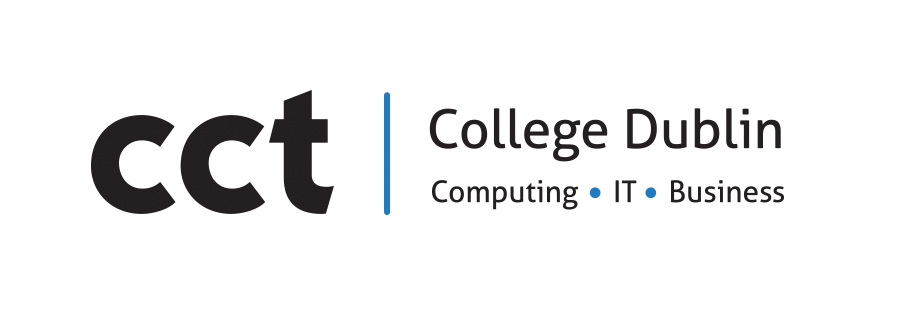

<h1><center><font face = 'Cambria'>Strategic Thinking- CA - Analysis of Credit Card Defaults Using Machine Learning</font></center></h1>
<h2><center><font face = 'Cambria'>As part of HDIP in Science in Data Analytics for Business (2021)</font></center></h2>
<h2><center><font face = 'Cambria'>Dawid Stachura sba21519 - Salah Agnir sba20051  </font></center></h2>
<h2><center><font face = 'Cambria'>Justin Secillano mda21237 - Michael Kenny sba20216</font></center></h2>
<h2><center><font face = 'Cambria'>Module Lecturer - James Garza</font></center></h2>

## Goals

Develop a machine learning strategy for a given domain, communicate this strategy effectively to team members, peers and project stakeholders.

Implement a range of classification and regression techniques and detail /document their suitability for a variety of problem domains.

Critically evaluate and optimise the performance of Machine Learning models. 


## Attribute Information

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay 
for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

The following process is an analysis and evaluation of existing machine learning models in predicting default in credit card customer behaviour.

The source of for dataset can be found on UCI Machine Learning Depository [1].

Yeh and Lien (2009) disclosed that dataset was collected and compiled as a consequence of cash and credit card crisis in Taiwan, which had resulted in bank overpayments to existing customers to maximise increase of existing market share. That action led to massive customer spends , which created immense credit and cash debts placed on banks and created economical problems in Taiwan. [2]
    
The dataset contains various information about the users, such age, martial status or education. It contains also the values paid to customers, and periods of oustanding payments and amounts paid by customers. 

The objective of dataset is to determine the pattern for positive default.

In order to predict these, the classification machine learning  models will be used.

## Importing Libraries
In this project numpy and pandas major libraries used for data wrangling, seaborn and matplotlib have been chosen as preffered visualisations modules.<br>
Further work on data includes use need of normalization and class balancing: these will be able to be generated by MinMax scaler and SMOTE. Following that the machine learning algorithm KNN is imported as selected clafficiaation tool and evaluation of results are availabe through sklearn.metrics components.

In [1]:
#pip install -U imbalanced-learn

In [2]:
#pip install tabulate

In [3]:
# Libraries used for general data wrangling
import numpy as np
import pandas as pd

# Visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

# This magic command will enable visualisations kept inside the notebook.
%matplotlib inline

# preprocessing steps (normalization)
from sklearn.preprocessing import MinMaxScaler

# Library used for balancing class distribution
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline

# Enables split of dataset to training and test components - crucial form modeling
from sklearn.model_selection import train_test_split

# machine learning methods used for dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning techniques
from sklearn.model_selection import GridSearchCV

# Evaluation of results
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Disables print of warnings and unharmful exceptions - used for clarity of output
import warnings
warnings.filterwarnings('ignore')

# Allows to view all columns in dataset
pd.set_option('display.max_columns',50)

## Loading data to notebook
After importing all libraries, dataset is loaded by using command read_excel.

In [4]:
data = pd.read_excel('default_of_credit_card_clients.xls', header = 1)

## Preliminary Data Exploration
The first step of the project is getting familiar with characteristics of data in order to plan the furter steps of the project. This step involve exploration of records dataset contains, types of features contained and presence of ossible obstacles in further analysis such missing values or presence of outliers.

In [5]:
# Displays first 5 data records, number of records can be specified in brackets
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Displays last 5 records
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In above it can be observed that predictors varies in their ranges, that suggests the further step in data transformation will include data scaling. Scaling is important in maximising classification accuracy by transforming all features to one range.<br>

Another observation is presence 0 values in features PAY. Sparsity can become a high problem for machine learning algorithm and by that reduce their effectiveness, however in case of this dataset 0 values does not cause a concern because values represent ordinal data type, where 0 represents specific outcome.
    
Additional information obtained is that dataset contains 30,000 observations, and 25 features
General information about dataset can be viewed by use of function info. Main benefits of this command is that it highlights presence of NaN values and provides list of all all features datatypes, which helps to plan further steps in analysing data.

In [7]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
nRow, nCol = data.shape
print(f'The dataset has {nRow} observations and {nCol} features')

The dataset has 30000 observations and 25 features



New commands showed that capacity of data is 5,7 MB, which is relatively small size of dataset and should enable heavier operations without decreasing processing speed significanlty
Another meaningful information is that there are no missing values in dataset, this is useful because no imputing or removing data is required. Availability of entire content will maximise accuracy results.


In order to confirm that there are no missing values, all features are checked with function isnull.sum().

In [9]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
 # replacing incorrect na values format with with Nan
data = data.replace(['na', '?', 'n.a.', 'n/a'], np.NaN)

# assigning variable missing_vales and calculating sum of all missing values
missing_values = data.isnull().sum().sum() 
print(f'There are {missing_values} NaN values in our dataframe.')

There are 0 NaN values in our dataframe.


<AxesSubplot:>

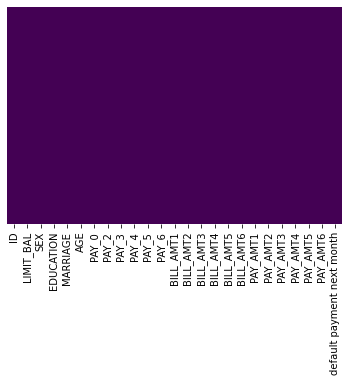

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We will use the seaborn library, there is a heatmap concept to help us to see if we have any missing value. There are 0 NaN values in our data frame. this is very useful because no imputing or removing data is required

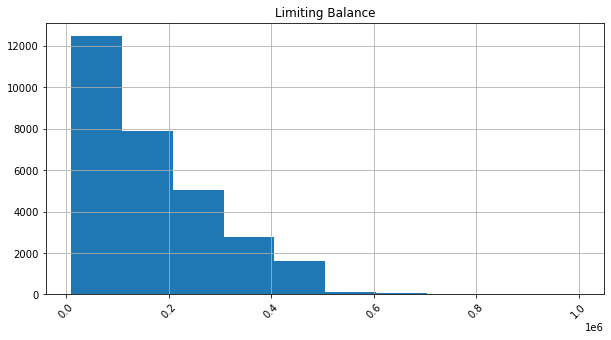

In [12]:
data.LIMIT_BAL.hist(figsize=(10,5), xrot=45)
plt.title("Limiting Balance")
plt.show()

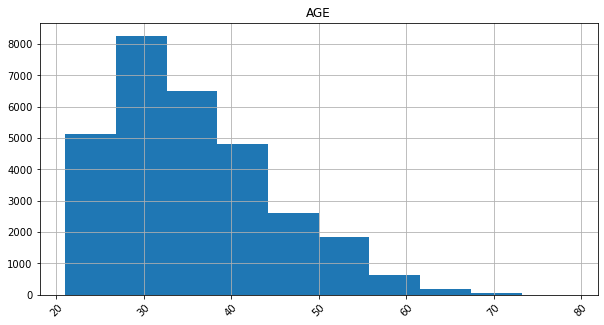

In [13]:
data.AGE.hist(figsize=(10,5), xrot=45)
plt.title("AGE")
plt.show()

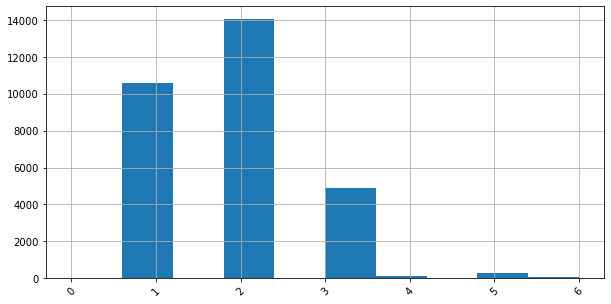

In [14]:
data.EDUCATION.hist(figsize=(10,5), xrot=45)
plt.show()

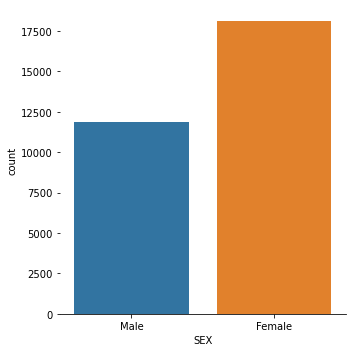

In [15]:
g = sns.catplot(x = "SEX", kind = "count",  data = data, )

g.despine(left=True)
g.set(xticklabels=["Male", "Female"])

we can see on the graph that male is 1 and 2 is Female

In [16]:
data["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

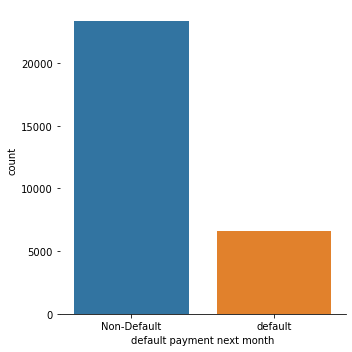

In [17]:
g = sns.catplot(x = "default payment next month", kind = "count",  data = data)

g.despine(left=True)
g.set(xticklabels=["Non-Default", "default"])

0 is non-Default and 1 is default

In [18]:
data["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

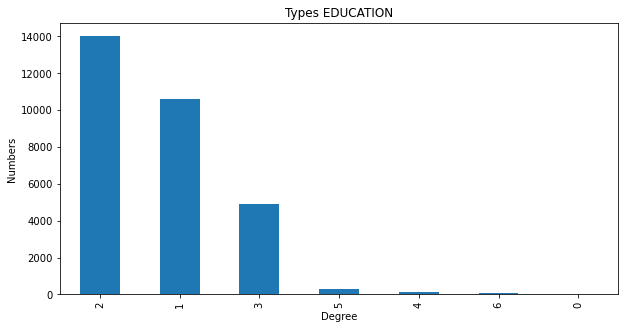

In [19]:
data.EDUCATION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Types EDUCATION")
plt.ylabel('Numbers')
plt.xlabel('Degree');

To check the EDUCATION feature We can clearly see 7 different degrees of education, but it is often important to know the category of people's degrees. To do this, the histogram is one of the trivial solutions which lets us know the total number of degrees by category. The majority is the number 2=university.

In [20]:
# Generating for loop to iterate over all records and print the number of NaN values to handle.
if missing_values.sum()==0:
    print('Dataset does not require NaN handling'),
else:
    print('There are : ', missing_values.sum(),'to handle')

Dataset does not require NaN handling


PAY columns indicating repayment status by month begin at PAY_0 and next is PAY_2 without a PAY_1. For clarity we can rename PAY_0 to PAY_1. We can also rename the 'default payment next month' to just 'DEFAULT_PAY'.

We can also drop the 'ID' column from our dataset as it does not benefit our analysis. Finally we will rename the dataframe as df for our analysis going forward.

In [21]:
data = data.rename(columns ={'PAY_0': 'PAY_1', 'default payment next month': 'DEFAULT_PAY'})
df = data.iloc[:,1:]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


According to the data dictionary that accompanies the dataset, we have 9 categorical variables. Each category is represented numerically, for example the feature Marital status, whose categories are (1 = married; 2 = single; 3 = others). We can examine the values present in each of these columns to confirm that all values correspond to a category in the data dictionary.

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


It can be seen that Education and Marriage contains additional values, Education maximum value is 6, where data dictionary provides maximum value as 4, and in Marriage there is 0 as minimum value ,where data dictionary provides 1 as minimum number.

These values will be evaluated by seperating them first into new feature called df2 along with sex and age, in order to further analyse their possible influence on default.

In [23]:
# defining categorical features df
categorical_features = df[['SEX','EDUCATION','MARRIAGE','AGE']] 

# stores names of columns
columns = categorical_features.columns

# for loop created to iterate over column names
for col in columns:
    print("\n" + col)
    print(categorical_features[col].value_counts()) #counts number of unique entries in column names

# sorts and converts to string type and create list of only unique elements in Marriage and Education    
Education = str(sorted(data['EDUCATION'].unique()))
Marriage = str(sorted(data['MARRIAGE'].unique()))    


SEX
2    18112
1    11888
Name: SEX, dtype: int64

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


From the value counts of each column, we can see that 'EDUCATION' contains 345 elements with values of 0, 5 or 6. The data dictionary for the education feature is  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). To amend this we can change the 0, 5, 6 values to be 'other' denoted as 4.

The column 'MARRIAGE' also contains elements not represented in the data dictionary, with 54 values of 0. The data dictionary for the marriage feature is  (1 = married; 2 = single; 3 = others). To amend this we are going to change the 0 values to 'others' denoted as 3.

In [24]:
to_replace = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[to_replace, 'EDUCATION'] = 4
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [25]:
sentence = 'Unique values in selected featured before modification: '
len1 = len(sentence)*'-'
print(sentence,len1,sep='\n')
print('EDUCATION ' + Education)
print('MARRIAGE ' + Marriage,'\n')

sentence2 = 'Unique values in selected featured after modification: '
len2 = len(sentence2)*'-'
print(sentence2,len2,sep='\n')
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

Unique values in selected featured before modification: 
--------------------------------------------------------
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3] 

Unique values in selected featured after modification: 
-------------------------------------------------------
EDUCATION [1, 2, 3, 4]
MARRIAGE [1, 2, 3]


The change in values is compared with previous status of features, modification enabled better clarification in relation to data assigned to ordinal values.

After feature cleaning its crucial to explore statistical properties of feature.
Firstly function describe() can provide 5 number summary for each feature then data shapes can be visualised with use of boxplots.

In [26]:
# Statistical summary: numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


Boxplot visualisation can be applied to all features in dataset. By examining data in this way data ranges can be evaluated and identificaton of outliers is easy to achieve.

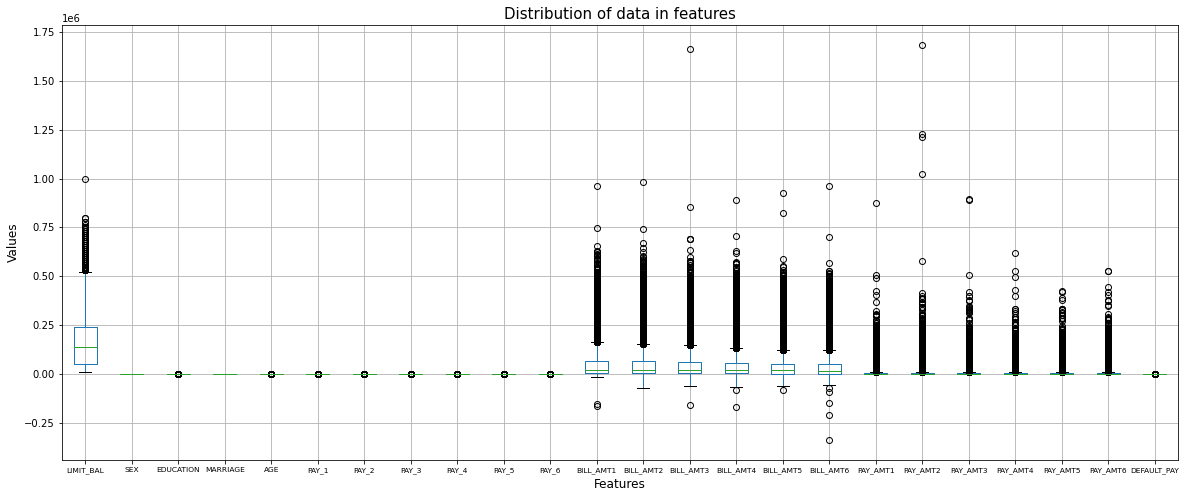

In [27]:
plt.figure(figsize=(20,8))

df.boxplot()
plt.title('Distribution of data in features', fontsize=15)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(fontsize=7.5)
plt.show()

It is clearly seen high number of outliers in multiple features shown as condensation of dots in boxplots.
These outliers however cannot be removed because they are present in features associated with money values an surely they are to be treated as significant influencers on data,they need to be kept for further analysis.
Depending on range and distribution dataset consists of two types of predictors: ones with small data range(features from SEX to PAY 6) and features with high data range (all remainng)

Following, the next visualisation depicts distributions in all features related to small data range.

The next graph is an exploration of features identified as small data ranges. The same type of boxplot can be used to get better view into their datat distibution.

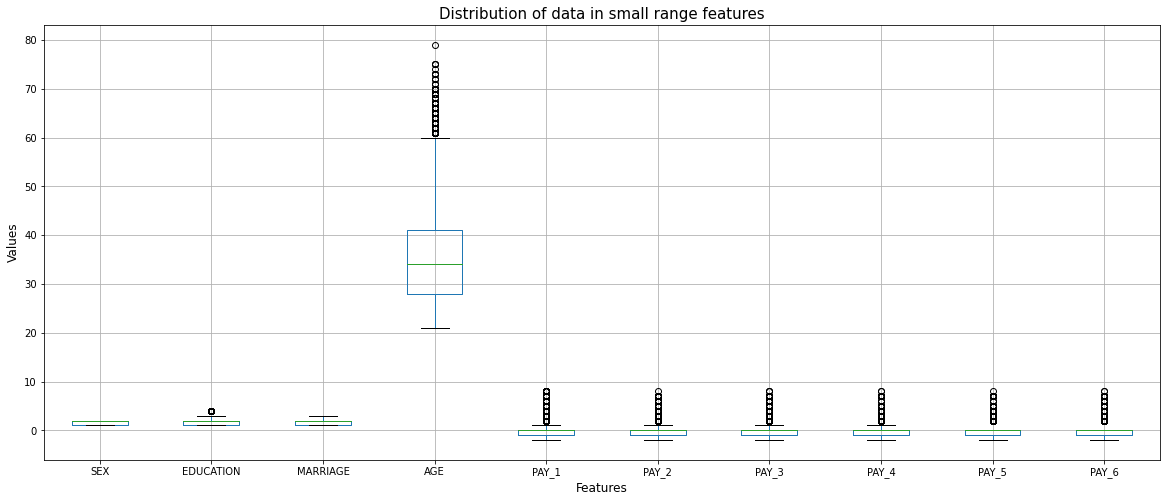

In [28]:
df2 = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
plt.figure(figsize=(20,8))

plt.title('Distribution of data in small range features', fontsize=15)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Features', fontsize=12)
df2.boxplot()
plt.xticks(fontsize=10)
plt.show()

AGE is an interesting feature becuase with closer look it seems to have distinct characteristics in data range. Shape of its distribution indicates relatively equal spread between quantiles, which suggests that large number of people in varying age group is recorder in dataset (with decreased trend towards older AGE group) All remaining features show similiar tendecies.

AGE can be examined more by visualising histograms from perspective of various factors.

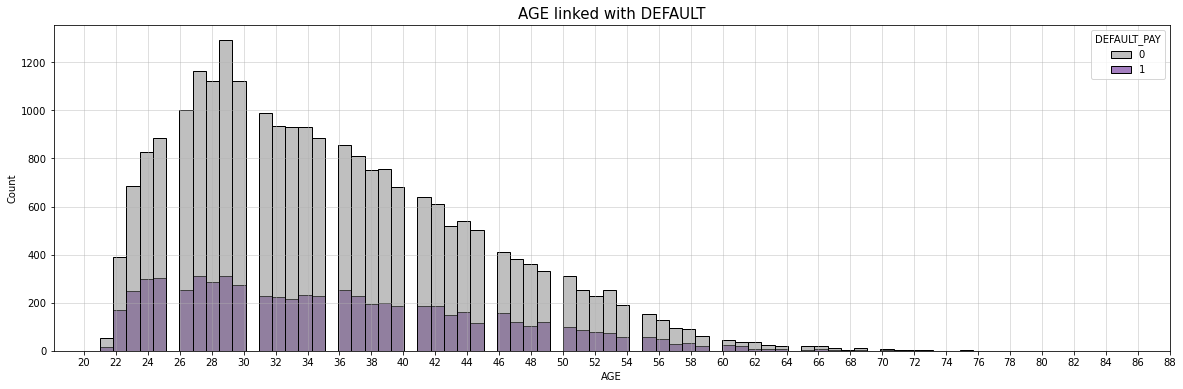

In [29]:
plt.figure(figsize=(20,6))
plt.title('AGE linked with DEFAULT', fontsize=15)
sns.histplot(x = df['AGE'], data=df, hue='DEFAULT_PAY',palette=['gray', 'indigo'])
plt.xticks(np.arange(20,90,step=2))
plt.grid(alpha=0.5)

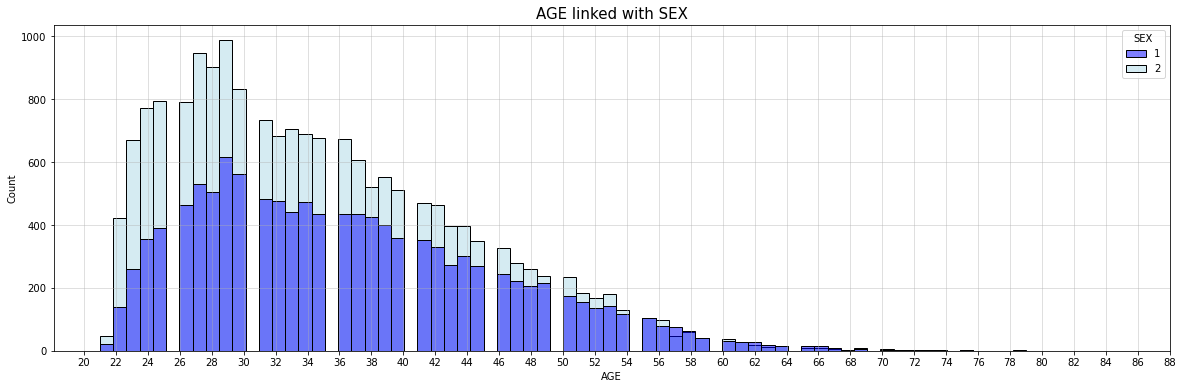

In [30]:
plt.figure(figsize=(20,6))
plt.title('AGE linked with SEX', fontsize=15)
sns.histplot(x = df['AGE'], data=df, hue='SEX',palette=['blue','lightblue'])
plt.xticks(np.arange(20,90,step=2))
plt.grid(alpha=0.5)

From above histograms, it can be seen that there is no significant relationship between age and default. Delay in payment occurs in all age groups.

More information can be obtained in cross examination of age and sex, which shows that there is increasing trend on male group with older age. That suggests Default can be also an indicator for male group in older group of clients.

Lastly all remaining features charactrized by small range beside "AGE" are visualised.

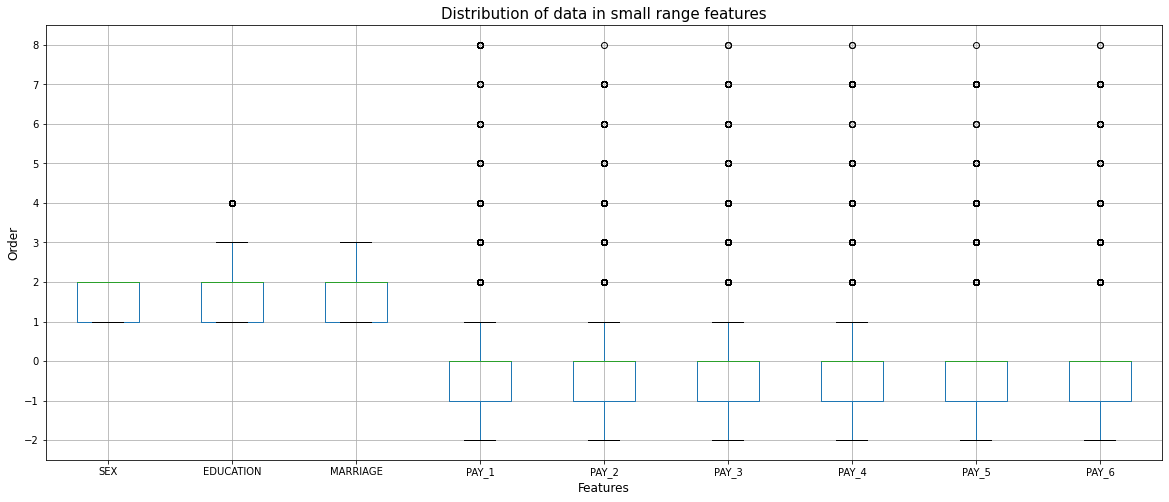

In [31]:
df2 = df.iloc[:,[1,2,3,5,6,7,8,9,10]]
plt.figure(figsize=(20,8))

plt.title('Distribution of data in small range features', fontsize=15)
plt.ylabel('Order', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.yticks(np.arange(-2,9,step=1))
df2.boxplot()
plt.xticks(fontsize=10)
plt.show()

There is nothing of ordinary for all those features, all represent ordinal variables. SEX, EDUCATION and MARRIAGE dominate in entries 1 and 2 and PAY features dominate in values between -1 and 0, which signifies no problems with payment and features from PAY_1 to PAY_4 signify higher tendency of small delays marked as value 1.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
ID,1.000000,0.026179,0.018497,0.037659,-0.028208,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.037659,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,0.104088,0.088986,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,0.033168,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.018678,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.030575,-0.271214,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


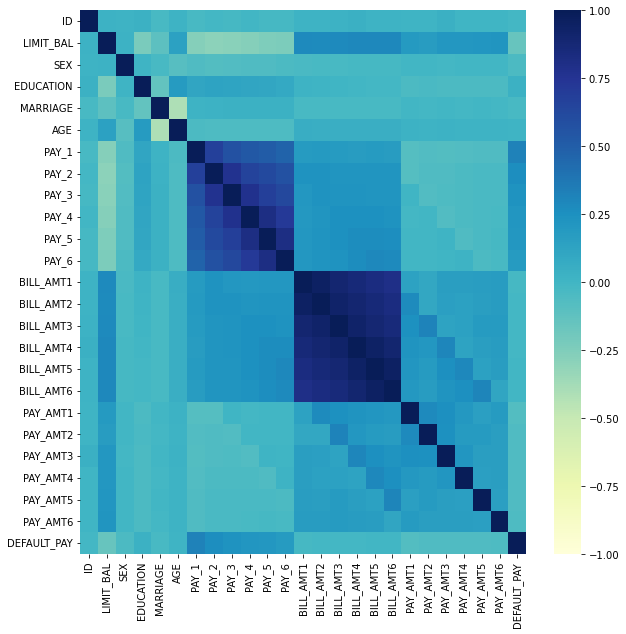

In [32]:
plt.figure(figsize=(10,10))
c= data.corr()
sns.heatmap(c,vmax=1,vmin=-1,cmap="YlGnBu",xticklabels=True,yticklabels=True)
c

From the seaborn library we use the .heatmap function to visualise the correlation of the features from our data. in the parameter, we state that the max min of the color bar is 1 and -1 respectively, cmap is the color type of the graph. In this graph the darker the blue the stronger the correlation. The lighter the yellow, the weaker the correlation.

### Data Scaling

In previous steps there was seen that features vaaries substantially in their data ranges, which needs to be changed in order to maximise classification of data. 
This will be achieved by scaling all features so they can be all measured in the same range.
In this project normalization with min max scaler have been decided as scaling method.
The reason of that choice is to convert ranges in between 0 and 1 values, which will be the best scale as already some the labels are already in range 0-1. 

In [33]:
# assigning variable x for normalization
x = df.values 

# creating variable containing min max scaler.
min_max_scaler = MinMaxScaler()

# process of transformation variable x with min max scaler
x_scaled = min_max_scaler.fit_transform(x)

# creating DataFrame containing scaled data and alligning the same column names as in original dataset
df_scaled = pd.DataFrame(x_scaled, columns = df.columns)

In [34]:
# Displaying scaled data
df_scaled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,0.010101,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.0,0.666667,0.0,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,0.141414,0.0,0.666667,0.5,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,0.020202,0.0,0.333333,0.5,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,0.070707,0.0,0.666667,0.0,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


In [35]:
df_scaled.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.603733,0.280756,0.278633,0.249750,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890,0.191846,0.112893,0.112157,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.221200
std,0.131058,0.489129,0.248165,0.260702,0.158929,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999,0.065159,0.067546,0.038076,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.000000,0.000000,0.000000,0.120690,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000,0.149668,0.069053,0.087808,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.000000
50%,0.131313,1.000000,0.333333,0.500000,0.224138,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.166324,0.086340,0.097374,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.000000
75%,0.232323,1.000000,0.333333,0.500000,0.344828,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.205887,0.126964,0.119378,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is clearly seen that ranges in dataset are now between 0 and 1, which will increase algorithm effectiveness.

### Visualizing The Relationship Between Default & Non-Default Outcomes

After dataset has been cleaned and prepared, the first visualisation is directed to relationship between binary output
Feature DEFAULT _PAY consist of two unique feature, which distribution can be checked by visualising each number of occurence of each class in all observations.

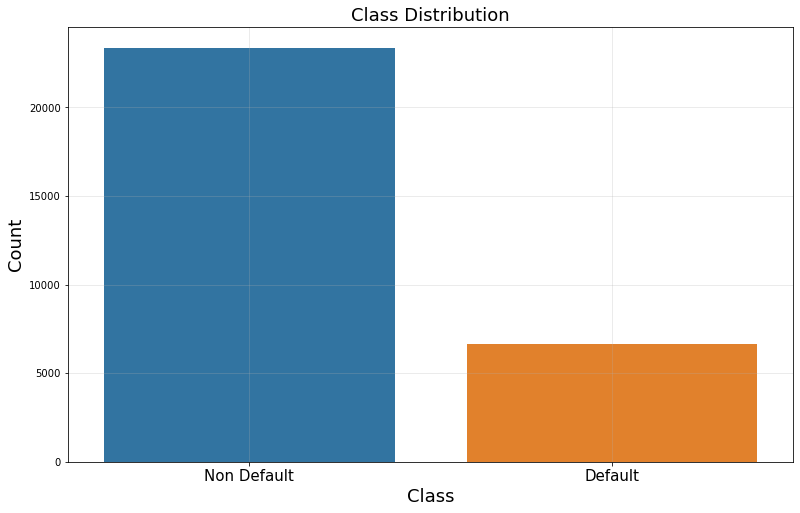

The count of 0: "NON DEFAULT" and 1: "DEFAULT" is: 
Non Default    23364
Default         6636
Name: DEFAULT_PAY, dtype: int64

The percentage: 
NON DEFAULT: 77.88 %
DEFAULT: 22.12 %


In [36]:
# setting size of graph
plt.figure(figsize=(13, 8))

classes = df_scaled['DEFAULT_PAY'].apply(lambda x: 'Default' if x==1 else 'Non Default')

# new variable storing count of unique entries
temp = classes.value_counts()

# barplot based on x: unique values, y: count of those vlues
sns.barplot(temp.index, temp.values)

plt.title('Class Distribution',fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Class', fontsize=18)

# xticks size
plt.xticks(fontsize=15)
plt.grid(alpha=0.3)

# generate clear visualisation
plt.show()

# count of unique values
print('The count of 0: "NON DEFAULT" and 1: "DEFAULT" is: ', temp, sep='\n',end='\n\n')

# the same values shown as percentage
print('The percentage: ', end='\n')
print('NON DEFAULT: {}'.format(df[df['DEFAULT_PAY']==0].shape[0]*100/df.shape[0],1), '%')
print('DEFAULT: {}'.format(df[df['DEFAULT_PAY']==1].shape[0]*100/df.shape[0],1), '%')

The results show that data is imbalanced, Non Default represent almost 78% of entire data content, whereas Default depicts over 22%. Unbalanced classes can be a problem for classyfication because during learning algorithm might omit minor class and show incorrect result.<br>
The fact that classes are imbalanced makes a need for balancing them. 
There are many techniques available , in this project SMOTE (synthetic minority oversampling techinique is used)

### Balancing Classes - SMOTE
SMOTE is a tool, which works by resampling data so it can increase proportion of minor class in dataset. By doing that it decreases chances that algorithm would omit minor class in training and testing phase.

In further steps algorithm will be tested on original class proportions and class proportions balanced with smote technique. The reason of that is to compare the results achieved with both secenarios, additionally the third component will be data treatment with default settings in classifier.

In below codes the example how SMOTE is working is presented.
By default SMOTE increases minor class to reach 50% of all records, the impact of this transformation can be visualised in form of barchart.

In [37]:
# splitting dataset into predictors and labels X, y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Balancing classes to default (equal measures)
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

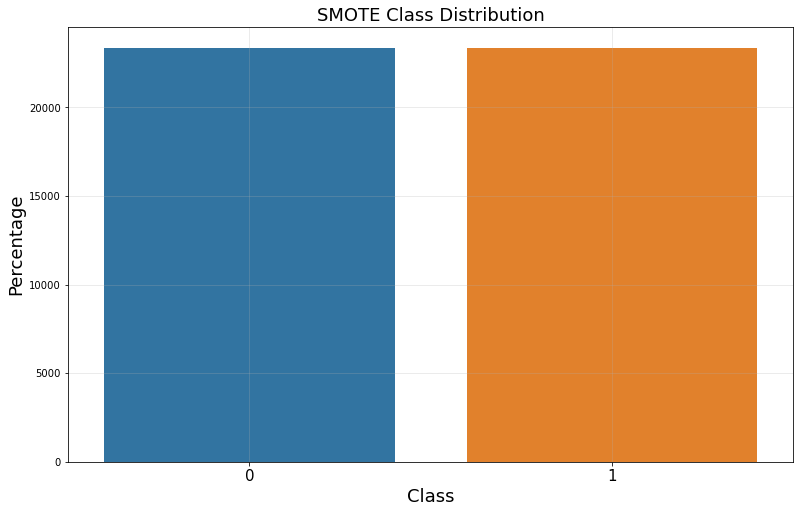

The count of 0: "NON DEFAULT" and 1: "DEFAULT" is: 
1    23364
0    23364
Name: DEFAULT_PAY, dtype: int64

The percentage: 
NON DEFAULT: 50.0 %
DEFAULT: 50.0 %


In [38]:
# visual representation of outcome (balancing classes)
# Setting size of plot
plt.figure(figsize=(13, 8))

#Assigning a variable temp to store oversampled class distribution
temp = y_smote.value_counts()

# barplot based on x: unique values, y: count of those vlues
sns.barplot(temp.index, temp.values, alpha=1)

plt.title('SMOTE Class Distribution',fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.xticks(fontsize=15)

plt.grid(alpha=0.3)
plt.show()

# count of unique values
print('The count of 0: "NON DEFAULT" and 1: "DEFAULT" is: ', temp, sep='\n',end='\n\n')

# the same values shown as percentage
print('The percentage: ', end='\n')
print('NON DEFAULT: {}'.format(y_smote.values[y_smote.values==0].shape[0]*100/y_smote.shape[0],1), '%')
print('DEFAULT: {}'.format(y_smote.values[y_smote.values==1].shape[0]*100/y_smote.shape[0],1), '%')

In further steps, following after dividing dataset into training and test components the right proportion of SMOTE will be generated. The above visualisation was presented to show the impact of oversampling on class distribution.<br>

### Modeling:
The fourth phase of crisp- dm  framework focuses on practical application of selected algorithm. 
This step includes the details selected modelling technique, which comprises the documentation of model used in this particular project as well as the modelling assumptions, which can be used as a guide in relation to requirements the data has to fulfil to maximise model effectiveness.To achieve better insight the activity is divided into two phases. First phase is dedicated to detailed application of one algorithm in three scenarios to assess the effects achieved with each of them and ditrect observation of SMOTE class balancing result. The second phase is focused on examination of additional models selected as best propositions algorithms for default prediction.
Modelling also contains the action of splitting dataset to training and test components, which will be used in further stages of the modelling phase. This is an important part of the framework as it: “describes  the intended plan for training, testing, and evaluating the model” (Smart Vision Europe, 2022).
Subsequently to that the main model is being introduced, built and assessed. The steps in the later stages very often contain general information about model selected for project and processes required to maximise model efficiency such as hyperparameter tuning and are concluded by examining model performance and matching it with business standards

##### Splitting dataset for Training and Testing

The performance of the model highly depends on the right proportions of training and test components applied on the dataset.  In Machine Learning dividing a dataset into training and test is a crucial step in model generation and obtaining prediction of explored data. The purpose of training is to provide contained data elements to the algorithm so it can recognise its patterns and learn from the best solutions for predictions and apply and compare them in data elements contained in test components. The subsequent results of these splits are examining the prediction by  cross validation of multiple samples obtained (named folds) and can be seen as a reliable metric for modelling performance. 

##### (Phase 1) - Training and test proportions in three scenarios with assesment on SMOTE models performance
The train-test split and hyperparameter tuning along with the results will be examined on three different scenarios: 
The proportions 80-20  for train test split used on the default kNN model model with X variable containing all predictor features (names as default_kNN)
Selection of best train-test proportion (checked by accuracy) used on kNN with hyperparameter tuning and class balance technique SMOTE with X variable containing most important features based on Linear Model (named as kNN_smote)
Selection of best train-test proportions (checked by accuracy) used on kNN with hyperparameter tuning with variable X containing most important features based on LInear model (named as kNN)

##### (Phase 2) -Training two versions of remaining models SMOTE and hyperparameter tuned to assess impact of class balance on models performance
The initial modeling with kNN will provide an insight about class balance impact on models performance , all remaining models will be trained from two modeling perspectives - one evaluating normal pmodel application with hyperparameter tuning and the other one balanced with SMOTE oversampling and compared in final evaluation.

* The first scenario (tuned_kNN) will be used as a threshold metric for remaining scenarios to measure possible improvements caused by hyperparameter tuning and class balancing. This scenario contains train -test proportions of 80% training dataset and 20% test dataset.


### Phase 1 - Modeling

##### Performance of default kNN with initial train test proportion 80-20

Firstly performance of cleaned dataset is being evaluated with default kNN parameters and with initial sample size 80:20 for training and test.

To do that variable X and y are created. Variable X stores predictors and variable y contains outputs(labels). The shape of these variables subsequently is examined wih method shape.

In [39]:
# selecting X and y variables from previously scaled dataset
X1 = df_scaled.iloc[:,:-1]
y1 = df_scaled.iloc[:,-1]

# printing the size of variables
print('The Dimensions of splitted dataset with outliers : \n')
print('Predictors dimensions: ', X.shape)
print('Label Dimensions: ', y.shape, '\n', '\n')

The Dimensions of splitted dataset with outliers : 

Predictors dimensions:  (30000, 23)
Label Dimensions:  (30000,) 
 



##### K Neighbor Classifier (kNN) <br><br>

<font face = 'Cambria'>
    In this project there are at least 4 classification algorithms used and the first one selected is  K-Nearest Neighbors. The reason for choosing this algorithm is its ability to generate reasonably high results with little effort, which places it as a good starting point in any classification type problem.<br><br>
    
   The first scenario consists of knn classifier in its default form used on 20-80 test-train proportions. The training and prediction will be obtained with its default settings. The reson of placing that method as first is obtaining default classifier performance, which will be used as assement measure for models treated by hyperparameter tuning and careful feature selection for X variable in further steps.
<font size="+0.5">
   

In [40]:
# Default result based on split 0.2 :  0.8
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [41]:
# creating variable to store classifier
kNN_default = KNeighborsClassifier()

# training predictors and labels
kNN_default.fit(X_train, y_train)

# predictor labels, which will be used as a performance measure
y_pred = kNN_default.predict(X_test)

When the prediction was established, the performance of default knn needs to be measured.<br>
This can be done by measuring the accuracy score, which was imported from sklearn module at beginning of this report as well as by measuring prediction by checking confusion matrix and classification report.

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      4703
         1.0       0.52      0.34      0.41      1297

    accuracy                           0.79      6000
   macro avg       0.68      0.63      0.64      6000
weighted avg       0.77      0.79      0.77      6000



In [43]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matricx for default kNN:',cm,sep='\n\n')

Confusion matricx for default kNN:

[[4306  397]
 [ 859  438]]


In [44]:
print( "Accuracy of default kNN model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy of default kNN model: 0.791


The result of this process depicted a 0.791 score, although not exceeding 80%, the score can be considered a good accuracy score according to the Allwright concept (2022). This measure has been adopted as a baseline for other two scenarios.

Another notable observation is the difference between Preision and Recall, showing much lower recall and indicating by that lower ability of correct default class prediction. This is seen in confusion matrix, where correct default class equals 438 cases where 859 cases were predicted incorrectly as class 0.

The next way of measuring the score is done by assesment of ROC AUC scores.
Receiving Operator Characteristics (ROC) and Area Under the Curve (AUC) are effective tools in measuring classification  model performance.

Narkhede (2018) explains functionality of  ROC and AUC by stating that ROC is a visualisation of the probability curve and AUC is seen as the measure of class  separability. In simple terms the measure shows how well class separability takes place in models used on dataset. The higher AUC scores depict the higher ability of the model to predict classes correctly.

In [45]:
# import ROC AUC metrics from sklearn
from sklearn.metrics import roc_curve, roc_auc_score

# calculation of probability for default knn to measure ROC AUC score
y_pred_proba_KNN_default = kNN_default.predict_proba(X_test)[::,1]

# establish the false positive rate, true positive rate and threshold and by that measure ROC AUC score
fpr_default, tpr_default, thresh_default = roc_curve(y_test, y_pred_proba_KNN_default)
roc_auc_kNN_default = auc(fpr_default, tpr_default)

print('The result of roc auc is: ',roc_auc_kNN_default.round(3))

label_default = y_test

The result of roc auc is:  0.697


Initial results for default machine learning performance with initial train test split parameters have shown score 0.701 for AUC, which means that 70% of times classes were predicted correctly. This score is not too high, but its still shows good seperatibility accoding to general measure.

Next step is to improve that score and test data on classes balanced by classifier with SMOTE() used on it. This is the second scenario tested in this project.

* The second scenario: (SMOTE knn) will go through an oversampling process prior to train-test split. The oversampling strategy for minor class will be assessed from performance point of view, also X features for that scenario will be selected by feature importance method based on linear regression measures..


##### Selecting Features based on Feature importance technique

To imporve model performance each feature will be checked how important it is based on Linear regression score.

Features scores of importance:

Feature: 0, Score: -0.08999
Feature: 1, Score: -0.01469
Feature: 2, Score: -0.04553
Feature: 3, Score: -0.05325
Feature: 4, Score: 0.07803
Feature: 5, Score: 0.95686
Feature: 6, Score: 0.19453
Feature: 7, Score: 0.11723
Feature: 8, Score: 0.03355
Feature: 9, Score: 0.05671
Feature: 10, Score: 0.00825
Feature: 11, Score: -0.70571
Feature: 12, Score: 0.16788
Feature: 13, Score: 0.04989
Feature: 14, Score: -0.07133
Feature: 15, Score: -0.02313
Feature: 16, Score: 0.15566
Feature: 17, Score: -0.64712
Feature: 18, Score: -0.35048
Feature: 19, Score: -0.02635
Feature: 20, Score: -0.15677
Feature: 21, Score: -0.14682
Feature: 22, Score: -0.05249


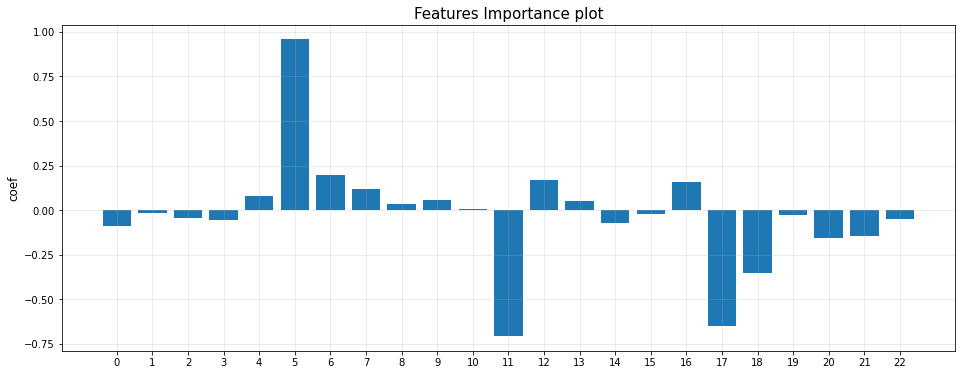

In [46]:

# linear regression feature importance
from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()

# fit the model
model.fit(X1, y1)

# get importance
importance = model.coef_

# summarize feature importance
print('Features scores of importance:',end='\n\n')
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(16,6))
plt.title('Features Importance plot', fontsize=15)
plt.bar([x for x in range(len(importance))], importance)
plt.ylabel('coef',fontsize=12)
plt.xticks(np.arange(0,23,step=1))
plt.grid(alpha=0.3)
plt.show()

By examining the results there can by seen that features 5, 6, 11, 12, 16, 17, 18, 20 and 21 are important. They will be used for new X named as X1.

##### Examining SMOTE model performance
After establishing the most important features for X variable, the oversampling strategy will be evaluated by measuring performance with use of for loop.

In [47]:
# assigning new predictor variable
X2 = X1.iloc[:,[5,6,11,12,16,17,18,20,21]]

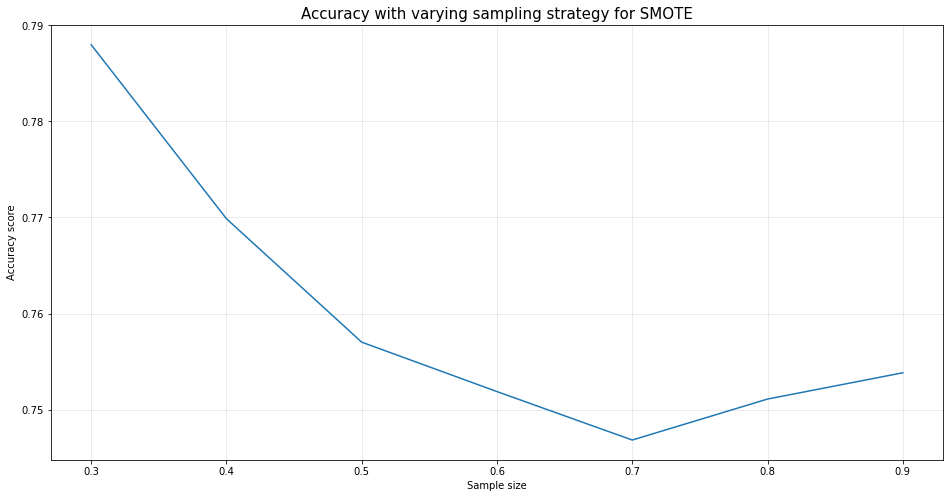

In [48]:
# variable storing list of n results for varying sample proportions
results = []

# for loop applied on each resample size
for i in np.arange(0.3,1,step=0.1):
    #new variable for smote
    oversample = SMOTE(sampling_strategy=i, random_state=0)
    
    #fitting resampling on data
    X_smote, y_smote = oversample.fit_resample(X2,y1)
    
    #new train test split based on resampled data
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 0)
    
    #fitting kNN on resampled data
    kNN_smote = KNeighborsClassifier()
    kNN_smote.fit(X_train, y_train)
    
    #prediction and storing accuracy scores for each sampling strategy
    y_pred = kNN_smote.predict(X_test)
    results.append(metrics.accuracy_score(y_test, y_pred))

#visualisation of results
plt.figure(figsize=(16,8))
plt.title('Accuracy with varying sampling strategy for SMOTE', fontsize=15)
plt.xlabel('Sample size')
plt.ylabel('Accuracy score')
plt.plot(np.arange(0.3,1,step=0.1),results)
plt.grid(alpha=.3)
plt.show()

The performance score decreases with increase of sampling strategy. Sample strategy 0.3 (30%-70%) shows the highesty accuracy results, and this strategy will be used in further steps in Ssmote knn scenario.

In [49]:
# creating smote model with new strategy
oversample = SMOTE(sampling_strategy=0.3, random_state=0)

#fitting smote on new x variable and labels
X_sam, y_sam = oversample.fit_resample(X2,y1)

After oversampling the mior class the model with new class proportions will be tested with knn classifier.

In [50]:
# assigning inital train-test split on 0.75 - 0.25, and oversampled variables
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.25, random_state = 0)

# fitting smote_knn
kNN_smote.fit(X_train, y_train)

#predictions 
y_pred = kNN_smote.predict(X_test)
print('SMOTE kNN score with sampling strategy 0.3 applied on default kNN settings:', metrics.accuracy_score(y_test, y_pred))

SMOTE kNN score with sampling strategy 0.3 applied on default kNN settings: 0.7879905188306557


The result for resamped dataset (class balanced) showed slightly worse score compared to default kNN used on cleaned data.
This implies the negative impact of class balancing on dataset, however further improvement in form of hyperparameter tuning can be used on model. This can be started by establishing the most optimal test size proportion for this types of variables,
that can be assessed by for loop measuring performance scores with varying number of test sample.

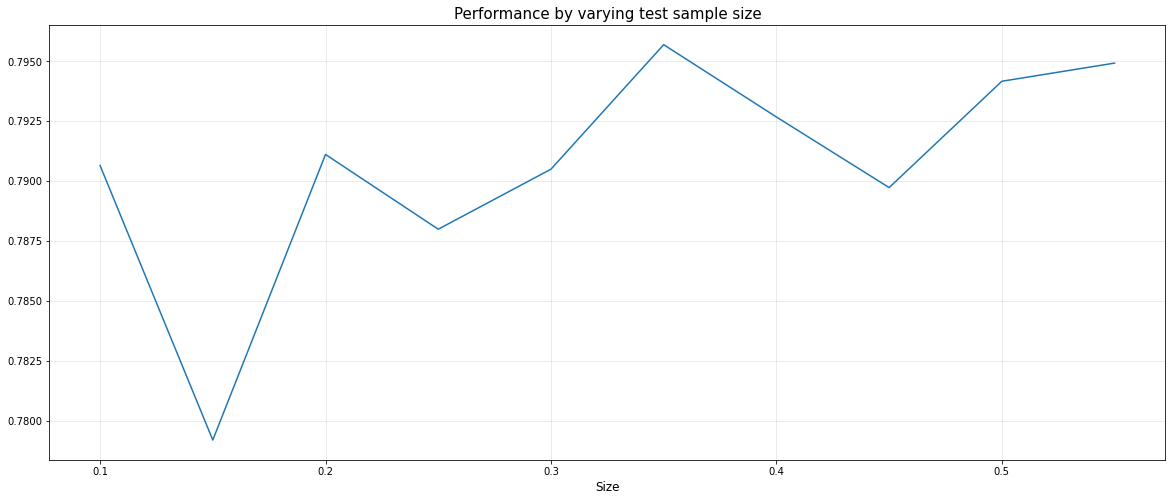

In [51]:
#establish variable list to stre results , which will be displayed later
best = []

# for loop to calulcate best score based on n for test sample sizes.
for i in np.arange(0.1,0.6,step=0.05):
    X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = i, random_state = 0)
    kNN_smote.fit(X_train, y_train)
    y_pred = kNN_smote.predict(X_test)
    best.append(metrics.accuracy_score(y_test, y_pred))
    
#visualisation    
plt.figure(figsize=(20,8))
plt.title('Performance by varying test sample size', fontsize=15)
plt.xlabel('Size', fontsize=12)
plt.grid(alpha=0.3)
plt.plot(np.arange(0.1,0.6,step=0.05),best)
plt.show()

For loop method had indicated that the best sample size is expected on 0.35 test 0.65 train proportions.
Subsequently the most optimal number for random_state is evaluated with the same method.

Best selection for random_state:  96
Score:  0.8


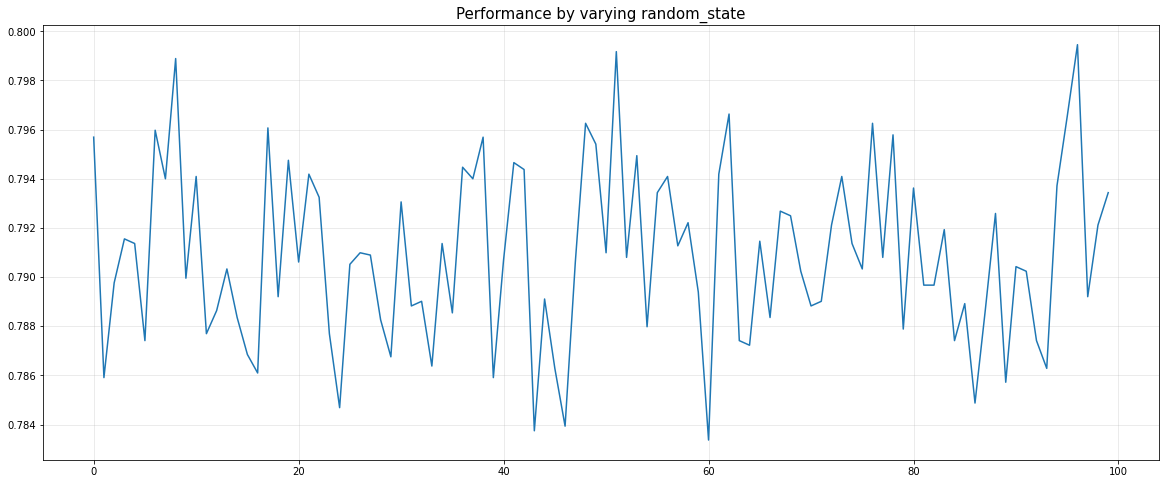

In [52]:
best = []
# for loop to evaluate performance of random state values
for i in range(0,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.35, random_state = i)
    kNN_smote.fit(X_train, y_train)
    y_pred = kNN_smote.predict(X_test)
    best.append(metrics.accuracy_score(y_test, y_pred))
    
    # shows the location of highest score
    index = best.index(max(best))

#visualisation
plt.figure(figsize=(20,8))
plt.title('Performance by varying random_state', fontsize=15)
plt.grid(alpha=0.3)

# prints the location of highest score stored
print('Best selection for random_state: ',index)

#prints the highest score stored
print('Score: ', np.round(max(best),2))
plt.plot(best)
plt.show()

The results shows that the best performance will be achieved with random_state = 96, these parameter will be used in following steps. Lastly , the most importnat hyperparameter in form of k eighbors will be evaluated. This can be assessed by generalzation level of training and test components by for loop in sequence 1 to 10 neighbors by measuring accuracy scores.


In [53]:
# initialising numer of neighbors to be examined
neighbors = np.arange(1, 10)                
train_accuracy_smote = np.zeros(len(neighbors))     
test_accuracy_smote = np.zeros(len(neighbors))   

In [54]:
# for loop generated to store performance of train and test samples to compare and achieve most optimal k
for i, k in enumerate(neighbors):                          
    kNN_smote = KNeighborsClassifier(n_neighbors = k)           
    kNN_smote.fit(X_train, y_train)                              
    train_accuracy_smote[i] = kNN_smote.score(X_train, y_train)        
    test_accuracy_smote[i] = kNN_smote.score(X_test, y_test)           

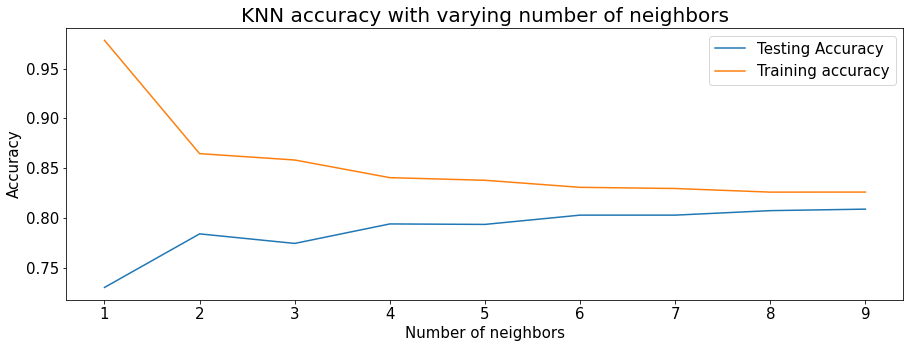

In [55]:
# visualisation of results
plt.figure(figsize = (15, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy_smote, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_smote, label = 'Training accuracy')
plt.legend(prop={'size': 15})
plt.xlabel('Number of neighbors', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Hyperparameter tunring shows that 8 is the most optimal number of k neighbors as it miimises accuracy differences between training and test components. The highest generalization with 8 neighbors can be observed by closest distance between two lines, which means that similiar accuracy is to be expected in training and test components.

When all parameters are established, the final model testing is conducted, this process is seen in below code.

In [56]:
kNN_smote = KNeighborsClassifier(n_neighbors=8)
kNN_smote.fit(X_train, y_train)
y_pred = kNN_smote.predict(X_test)
print('SMOTE knn Accuracy score is {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

SMOTE knn Accuracy score is 0.81


The result of second scenario shows 81% of accuracy , which is higher than result acheved with default kNN classifier. Thsi is a good sign, which indicates importance of hyperparameter tuning and class balancing in performance improvement.

The next measure to be examined is classification report with their precision and recall as well as confusion matrix.

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      8151
         1.0       0.69      0.32      0.43      2480

    accuracy                           0.81     10631
   macro avg       0.76      0.64      0.66     10631
weighted avg       0.79      0.81      0.78     10631



In [58]:
cm_smote = confusion_matrix(y_test,y_pred)
print('Confusion matricx for smote kNN:',cm_smote,sep='\n\n')

Confusion matricx for smote kNN:

[[7798  353]
 [1696  784]]


Lasty the ROC AUC can be assessed.

In [59]:
# calculation of probability for SMOTE knn to measure ROC AUC score
y_pred_proba_KNN_smote = kNN_smote.predict_proba(X_test)[::,1]

fpr_smote, tpr_smote, thresh_smote = roc_curve(y_test, y_pred_proba_KNN_smote)
roc_auc_kNN_smote = auc(fpr_smote, tpr_smote)
print('The result of roc auc is: ',roc_auc_kNN_smote.round(3))

label_smote = y_test

The result of roc auc is:  0.741


The most important observation for all these metrics is significant increase of Recall directed to class 1 (default), which signifies more accurate class 1 prediction. This is confirmed by AUC score, which reached 74% of all classes being predicted correctly and at the same time showing better class seperatibility.
The last scenario to be assessed is tuned knn model named as kNN.

##### kNN tuned and without class balance

The third scenario comprise of best train-test proportions (checked by accuracy) used on kNN with hyperparameter tuning with variable X containing most important features based on LInear model (named as kNN).

The same for loop method will be used to asses the best performance achieved with varying proportions of test sample.

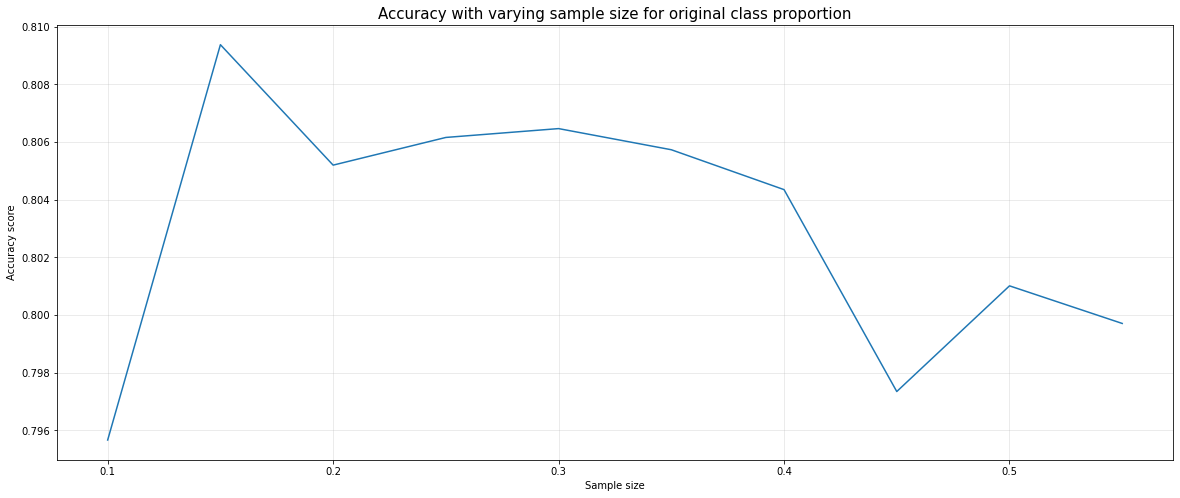

In [60]:
best = []
for i in np.arange(0.1,0.6,step=0.05):
    X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size = i, random_state = 0)
    kNN_tuned = KNeighborsClassifier()
    kNN_tuned.fit(X_train, y_train)
    y_pred = kNN_tuned.predict(X_test)
    best.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(20,8))
plt.title('Accuracy with varying sample size for original class proportion', fontsize=15)
plt.xlabel('Sample size')
plt.ylabel('Accuracy score')
plt.grid(alpha=0.3)
plt.plot(np.arange(0.1,0.6,step=0.05),best)
plt.show()

The result shows that original class proportions achieve best perfomance with 0.15 test 0.85 train selection

Best selection for random_state:  3
Score:  0.81


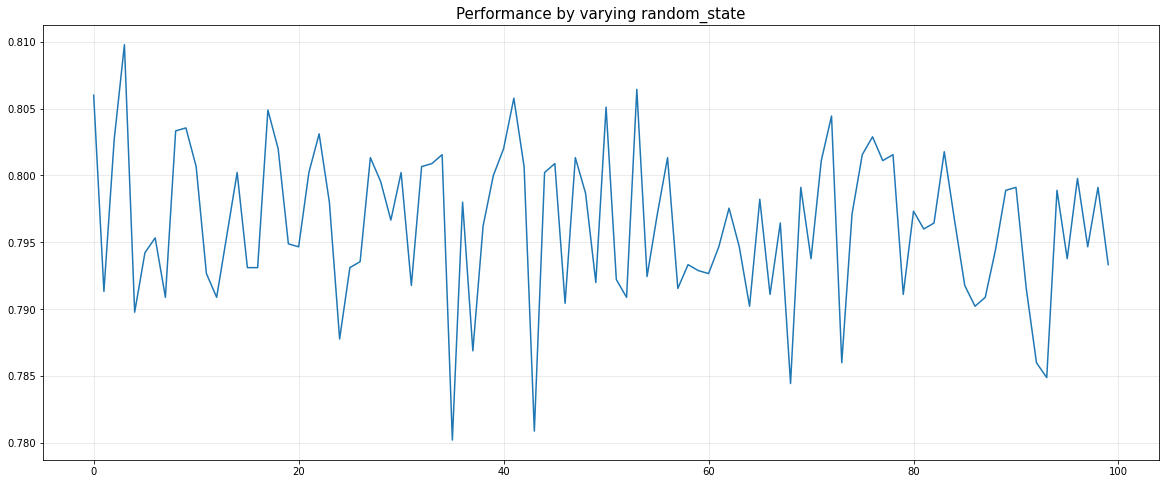

In [61]:
best = []
for i in range(0,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size = 0.15, random_state = i)
    kNN_tuned.fit(X_train, y_train)
    y_pred = kNN_tuned.predict(X_test)
    best.append(metrics.accuracy_score(y_test, y_pred))
    index = best.index(max(best))
plt.figure(figsize=(20,8))
plt.title('Performance by varying random_state', fontsize=15)
plt.grid(alpha=0.3)
print('Best selection for random_state: ',index)
print('Score: ', np.round(max(best),2))
plt.plot(best)
plt.show()

After exploring performance of test size and random_state the number of k value is examined.

In [62]:
# establishing new train-test proportions for third scenario
X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size = 0.15, random_state = 3)

Lastly the number of k neighbors is sexamined by the same method used on smote_knn in previous steps.

In [63]:
neighbors = np.arange(1, 10)                
train_accuracy = np.zeros(len(neighbors))     
test_accuracy = np.zeros(len(neighbors))

In [64]:
for i, k in enumerate(neighbors):                          
    kNN_tuned = KNeighborsClassifier(n_neighbors = k)           
    kNN_tuned.fit(X_train, y_train)                              
    train_accuracy[i] = kNN_tuned.score(X_train, y_train)        
    test_accuracy[i] = kNN_tuned.score(X_test, y_test) 

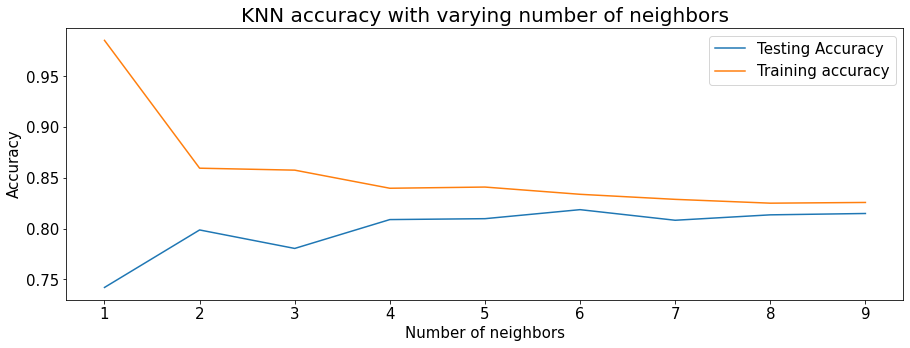

In [65]:
plt.figure(figsize = (15, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 15})
plt.xlabel('Number of neighbors', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

By looking at above visualisation is can be concluded that the best performance will be achieved with 6 neighbors. The generalization seems to be even better than one achieved with smote knn. These parameters will be used in following model training and measured by the same metrics used in previous scenarios.

In [66]:
kNN_tuned = KNeighborsClassifier(n_neighbors=6)
kNN_tuned.fit(X_train, y_train)
y_pred = kNN_tuned.predict(X_test)
print('kNN Accuracy score is {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

kNN Accuracy score is 0.82


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      3542
         1.0       0.66      0.30      0.41       958

    accuracy                           0.82      4500
   macro avg       0.75      0.63      0.65      4500
weighted avg       0.80      0.82      0.79      4500



In [68]:
cm_tuned = confusion_matrix(y_test, y_pred)
print('Confusion matricx for tuned kNN:',cm_tuned,sep='\n\n')

Confusion matricx for tuned kNN:

[[3396  146]
 [ 670  288]]


In [69]:
# calculation of probability for SMOTE knn to measure ROC AUC score
y_pred_proba_KNN = kNN_tuned.predict_proba(X_test)[::,1]

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_KNN)
roc_auc_kNN = auc(fpr, tpr)
print('The result of roc auc is: ',roc_auc_kNN.round(3))
tuned_label = y_test

The result of roc auc is:  0.709


The results of final scenario  show the worst score in relation to seperatibility in consfusion matrix for default values (670 to 288) and this is confirmed by lowest recall score 30, which means its probably not the best model to pick for default prediction.
The following section is concentrated on careful evaluation of all three scenarions and concluding , on the results.

### Support Vector Machine SVM

Another classifier selected for yhe project is Support Vector Machine (SVM). The objective of SVm is to find the most optimal hyperplane in n-dimensional space to genereate the best output in classification. SVM does it by creationg a margin between classes, which is based on the maximum distance between datapoints associated with each class. In this model hyperplanes are understood as decision boundaries that helps to classify opposing labels and by finding a location of datapoint on that hyper plane it can be linked to correct class.

The usefulness og this algorithm for default prediction is based on the fact that its considerd as one of the most succeesfull alorithms in credit card default prediction (Amarasinghe, 2018)

Firstly the default parameters are checked to obtain the results. The most universal selection for train -test porportiona in default sdettings is 80% train and 20% test division as there is a high calss imbalance in data present, these components are stratified to minimise effects of class imbalance, this process is by confirming parameter "stratify" in establishment of train test split proportions.

In [70]:
# Default result based on split 0.2 :  0.8
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0,stratify=y)

After ensuring that sample size for modeling is established, the modeling of svm can take place. The additional parameter in model generation has been intr=oduced as confirmed probability. The reason of specification for that metric is ensuring that model will be able to measure probability score, which can be compared in later stages as AUC score with rest of models.

In [71]:
# generte model 
svm_default = SVC(random_state=96,probability=True)
svm_default.fit(X_train, y_train)

# predictor labels, which will be used as a performance measure
y_pred = svm_default.predict(X_test)

Model fitting has been finalised and predictions in for of object y_pred are now generated. The first measurement of models performance will be examined with classification report, which will point out characteristic elements of modeling and help to identify strengths and weaknesses of modeling.

In [72]:
print( "Accuracy of default svm model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)),end='\n\n' )
print(classification_report(y_test,y_pred))

Accuracy of default svm model: 0.820

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4673
         1.0       0.71      0.31      0.43      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



The scores obtained are in close proximity to kNN. It can be seen  that recall score for default has 0.31, which is lower than result generated by kNN, beside of that accuracy of modeling had reached 82%., this is a good result but doesn't indicate imporvement to kNN model. The important information here is that these results were obtained with default model generation.

Another step to visualise the output of this process is by examination of consufion matrix. This metric willprovide an insight into errors occured in generating predicition,


In [73]:
#confusion matix for svm
cm_svm = confusion_matrix(y_test, y_pred)
print('Confusion matricx for svm:',cm_svm,sep='\n\n')

Confusion matricx for svm:

[[4507  166]
 [ 917  410]]


In [74]:
# calculation of probability for default svm to measure ROC AUC score
y_pred_proba_dsvm = svm_default.predict_proba(X_test)[::,1]

fpr_dsvm, tpr_dsvm, thresh_dsvm = roc_curve(y_test, y_pred_proba_dsvm)
roc_auc_dsvm = auc(fpr_dsvm, tpr_dsvm)
print('The result of roc auc is: ',roc_auc_dsvm.round(3))
dsvm_label = y_test

The result of roc auc is:  0.723


The accuracy score for default classifier set on 0.2 test size gave already very good accuracy score, the auc with initial settings is also good with 72% ofclass seperability.Now the best parameters split will be evaluated with examination of accuracy score with in 5 folds for each parameter. The main objective of it is to maximise recall score and imporve class separability. The parameters selected are C value to compromise on the errors in hyperparametr tuning and gamma value to inncrease the ability to classify more accurately. The kernel used in this process is rbf.

As the dataset presents a challenge of class imbalance , the stratified kfol is added into hyperparameter tuning to minimise negative effect of class imbalance.

In [75]:
# set parameters of stratified cross validation to minimie effects of class imbalance
kf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 17)

In [76]:
# specify parameters for grid search cv to find best ones
parameters = {'C':[5,6,7],
              'kernel':['rbf'],
              'gamma':[1]}

# model wih grid search cv to find best parameters
optimal_svm = GridSearchCV(SVC(random_state=96), parameters,cv=kf, scoring='accuracy', verbose=3)

# assign correct train test proportions for meodeling
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.15, random_state = 0)


After establishiing parameters to be evaluated in Grid Search, the model will test each of them from accuracy perspective and identify the best performing parameters with accuracy score.

In [77]:
optimal_svm.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..........C=5, gamma=1, kernel=rbf;, score=0.814 total time=  13.0s
[CV 2/5] END ..........C=5, gamma=1, kernel=rbf;, score=0.817 total time=  13.8s
[CV 3/5] END ..........C=5, gamma=1, kernel=rbf;, score=0.809 total time=  13.2s
[CV 4/5] END ..........C=5, gamma=1, kernel=rbf;, score=0.815 total time=  12.7s
[CV 5/5] END ..........C=5, gamma=1, kernel=rbf;, score=0.812 total time=  13.1s
[CV 1/5] END ..........C=6, gamma=1, kernel=rbf;, score=0.814 total time=  13.7s
[CV 2/5] END ..........C=6, gamma=1, kernel=rbf;, score=0.817 total time=  13.6s
[CV 3/5] END ..........C=6, gamma=1, kernel=rbf;, score=0.809 total time=  14.5s
[CV 4/5] END ..........C=6, gamma=1, kernel=rbf;, score=0.815 total time=  16.6s
[CV 5/5] END ..........C=6, gamma=1, kernel=rbf;, score=0.812 total time=  14.0s
[CV 1/5] END ..........C=7, gamma=1, kernel=rbf;, score=0.814 total time=  13.6s
[CV 2/5] END ..........C=7, gamma=1, kernel=rbf;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=SVC(random_state=96),
             param_grid={'C': [5, 6, 7], 'gamma': [1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

The best parameters can be identified by using method best_params_ applied on Grid Search.

In [78]:
# identify the best parameters for modeling
optimal_svm.best_params_

{'C': 6, 'gamma': 1, 'kernel': 'rbf'}

Grid Search CV have indicated the best parameters to be used for this type of model. The specified parameters are C as 6, gamma:1 and rbf kernel. These parameters will be subsequently applied to modeling

In [79]:
# build optimised model with best parameyters identified
svm = SVC(C=6, gamma=1, random_state=96, kernel='rbf',probability=True)
svm.fit(X_train, y_train)

# predictor labels, which will be used as a performance measure
y_pred = svm.predict(X_test)

The results of that operations are examined with use of classification report.

In [80]:
print( "Accuracy of svm model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)),end='\n\n' )
print(classification_report(y_test,y_pred))

Accuracy of svm model: 0.817

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      3526
         1.0       0.70      0.33      0.44      1030

    accuracy                           0.82      4556
   macro avg       0.77      0.64      0.67      4556
weighted avg       0.80      0.82      0.79      4556



The accuracy achieved with both models oscillate at the same level of 0.82. The noticeasble difference is that recall score for SMOTE model is higher, although not significanlty by 0.02 points for class 1, The f1 score for default class had also increased by 1%. With such small overall recall for class 1 , low icrease doesn't create big imporvement, yet is stil shows the positive influence of class balance method on features.

To obtain count of correct prediction confusion matrix for this modeling is also generated.

In [81]:
#confusion matix for svm smote
cm_svm_smote = confusion_matrix(y_test, y_pred)
print('Confusion matricx for svm:',cm_svm_smote,sep='\n\n')

Confusion matricx for svm:

[[3385  141]
 [ 695  335]]


As observed in count of predictions there is lower count of error types in confusion matrix and higher number of positively predicted labels. This indicate positive influence of class balancing for this type of algorithm.

Another step is to calculate roc auc score to see the ability of model to seperate classes.

In [82]:
# calculation of probability for svm SMOTE to measure ROC AUC score
y_pred_proba_svm = svm.predict_proba(X_test)[::,1]

fpr_svm, tpr_svm, thresh = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print('The result of roc auc is: ',roc_auc_svm.round(3))
svm_label = y_test

The result of roc auc is:  0.698


The ROC AUC is below 0.7, and singnificantly lower than result achieved with kNN smote model. The result is also lower than one achieved with default svm, which means that class balancing hadn't caused positive impact on models performance. The very low result might have been caused by stratified kfold cross validation as second method to minimise negative impact of class imbalance.

### Decision Trees Classifier

In [83]:
DTC = DecisionTreeClassifier(random_state = 0)

DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print('Accuracy default: ', accuracy_score(y_test, y_pred))

Accuracy default:  0.7267339771729587


After running the code, we retrieved the result 0.72.
This result is acceptable but we can improve the accuracy by applying the SMOTE or
balancing the data.

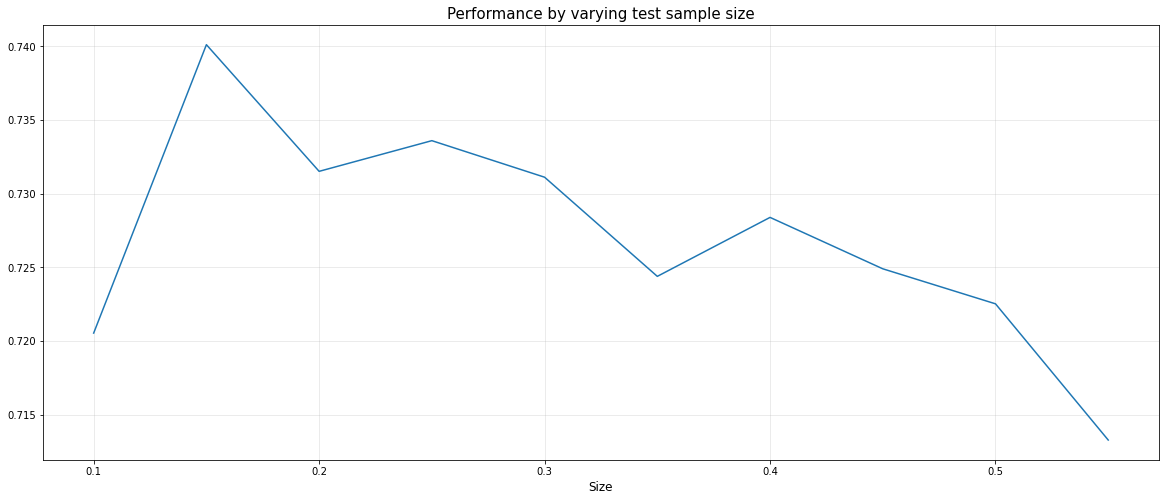

In [84]:
#establish variable best to obtain results for modeling to be displayed
best = []
DTT_smote = DecisionTreeClassifier(random_state = 0)
# for loop to calulcate best score based on n for test sample sizes.
for i in np.arange(0.1,0.6,step=0.05):
    X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = i, random_state = 96)
    DTT_smote.fit(X_train, y_train)
    y_pred = DTT_smote.predict(X_test)
    best.append(metrics.accuracy_score(y_test, y_pred))
    
#visualisation    
plt.figure(figsize=(20,8))
plt.title('Performance by varying test sample size', fontsize=15)
plt.xlabel('Size', fontsize=12)
plt.grid(alpha=0.3)
plt.plot(np.arange(0.1,0.6,step=0.05),best)
plt.show()

The best sample size is expected on 0.15 
This result shows that original class proportions achieve best performance with 0.15 test 0.5 train selection.


In [85]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, cv=kf)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [86]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)

In [87]:
grid_search_cv.best_params_

{'max_leaf_nodes': 11, 'min_samples_split': 2}

In [88]:
X_train,X_test, y_train,y_test = train_test_split(X_sam,y_sam,test_size=0.15,random_state=96)

In [89]:
# prediction based on smote
DTC = DecisionTreeClassifier(max_leaf_nodes = 5, min_samples_split = 2, random_state = 0)

DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print('Accuracy default: ', accuracy_score(y_test, y_pred))

Accuracy default:  0.8156277436347673


The accuracy 0.81 is improved and achieves better results this is why SMOTE is the best option to improve the accuracy

In [90]:
print( "Accuracy of Decision trees  smote model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)),end='\n\n' )
print(classification_report(y_test,y_pred))

Accuracy of Decision trees  smote model: 0.816

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      3522
         1.0       0.70      0.32      0.44      1034

    accuracy                           0.82      4556
   macro avg       0.77      0.64      0.67      4556
weighted avg       0.80      0.82      0.79      4556



In the report we see the accuracy is 0.81 then the precision for the class 0(no) is 0.83 and after the recall is 0.96.
The class 1(yes) the precision is 0.70 and the recall is 0.32.
The result of this process depicted a 0.81. This score can be considered a good accuracy.

In [91]:
cm_dt_smote = confusion_matrix(y_test, y_pred)
print('Confusion matricx for rf_smote:',cm_dt_smote,sep='\n\n')

Confusion matricx for rf_smote:

[[3380  142]
 [ 698  336]]


Here 3380/336 are the correct predictions and 142/698 are errors.
Another step is to calculate roc auc score to see the ability of the model to separate classes.

In [92]:
# calculation of probability for SMOTE decision trees to measure ROC AUC score
y_pred_proba_dt_smote = DTC.predict_proba(X_test)[::,1]

fpr_dt_smote, tpr_dt_smote, thresh_dt_smote = roc_curve(y_test, y_pred_proba_dt_smote)
roc_auc_dt_smote = auc(fpr_dt_smote, tpr_dt_smote)
print('The result of roc auc is: ',roc_auc_dt_smote.round(3))
dt_smote_label = y_test

The result of roc auc is:  0.728


AUC means the area under the curve is mostly used for binary classification problems.
Here we can say that the more area under the curve the better the model is excellent. 0.72 is a high percentage which makes it a good result. 

### Logistic Regression

Logistic regression is a machine learning algorithm technique borrowed from the field of statistics. It is a supervised learning classification algorithm and it’s a go to method to solve for binary classification problem. There are three types of logistic regression. The first one is Binary where we have two possible outcomes, second one is multinomial where we have multiple outcomes, and finally, ordinal where the outcome is ordered. An example of ordinal would be sorting the severity of covid infection into mild, moderate, and severe cases. In this assignment we are solving for a binary problem.

We use the sigmoid function also known as the logistic function to calculate probability in logistic regression. this function is an S shaped curve and will map any real value into another value between 0 and 1. (pant, 2019). this machine learning model will predict the probability of non-default and default payments.

In [93]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [94]:
kf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 17)

K-Fold Cross Validation approach. this means that we split the data set into n amount. in this scenario since our n_splits is 5, this means that we split the data into 5 parts. by doing this we can test the data 5 times and on each iteration the training and test data changes. by doing this it gives our model the opportunity to train on multiple train-test splits. this can indicate tht our model can perform better on new unseen data (Benner, 2022)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [96]:
lr = LogisticRegression(solver="saga")

In [97]:
lr.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [98]:
y_pred = lr.predict(X_test)

In [99]:
print( "Accuracy of default Log model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)),end='\n\n' )
print(classification_report(y_test,y_pred))

Accuracy of default Log model: 0.818

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      4703
         1.0       0.77      0.23      0.35      1297

    accuracy                           0.82      6000
   macro avg       0.80      0.60      0.62      6000
weighted avg       0.81      0.82      0.78      6000



In [100]:
y_pred_proba_log = lr.predict_proba(X_test)[::,1]

fpr_lr, tpr_lr, thresh_smote = roc_curve(y_test, y_pred_proba_log)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print('The result of roc auc is: ',roc_auc_lr.round(4))
lr_label = y_test

The result of roc auc is:  0.7168


The results show that our accuracy went down when we applied smote, cross validation and hyper parameter tuning but the roc auc went up.


In [101]:
cm_lr = confusion_matrix(y_test, y_pred)
print('Confusion matricx for rf_smote:',cm_dt_smote,sep='\n\n')

Confusion matricx for rf_smote:

[[3380  142]
 [ 698  336]]


In [102]:
parameters1 = [{'penalty':['l1','l2','elasticnet']}, 
              {'C':[.01, .1, 1, 10, 100]},
              {"solver":["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]}]

lr_cv1 = GridSearchCV(estimator = lr,  
                           param_grid = parameters1,
                           scoring = 'accuracy',
                           cv = kf,
                           verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.2, random_state = 0)

#optimal log fit
lr_cv1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=LogisticRegression(solver='saga'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'C': [0.01, 0.1, 1, 10, 100]},
                         {'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             scoring='accuracy')

In [103]:
y_pred = lr_cv1.predict(X_test)

In [104]:
print( "Accuracy of Log model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)),end='\n\n' )
print(classification_report(y_test,y_pred))

Accuracy of Log model: 0.805

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.89      4687
         1.0       0.72      0.24      0.36      1388

    accuracy                           0.81      6075
   macro avg       0.77      0.61      0.62      6075
weighted avg       0.79      0.81      0.76      6075



In [105]:
y_pred_proba_log_smote = lr_cv1.predict_proba(X_test)[::,1]

fpr_lr_smote, tpr_lr_smote, thresh_smote = roc_curve(y_test, y_pred_proba_log_smote)
roc_auc_lr_smote = auc(fpr_lr_smote, tpr_lr_smote)
print('The result of roc auc is: ',roc_auc_lr_smote.round(4))
lr_smote_label = y_test

The result of roc auc is:  0.7322


In [106]:
cm_lr_smote = confusion_matrix(y_test, y_pred)
print('Confusion matricx for rf_smote:',cm_dt_smote,sep='\n\n')

Confusion matricx for rf_smote:

[[3380  142]
 [ 698  336]]


## Blind Machine Learning - Decision Tree

One way to begin implementing a data science solution is to take a ‘blind’ approach. In this case blind refers to unfiltered or minimally engineered application of machine learning algorithms, to observe quick results. Our goal in doing so, is to see some improvements or indications of successful correlation and learnings from which we can further engineer our features and tune our models.

This could be a useful model for our dataset, as it is a model that works well with both continuous and categorical variables. With a decision tree, each split is based on a feature. If the feature is categorical, the split is done based on elements fitting into a particular class. If the feature is continuous, the split is made based on a threshold. As our dataset contains a large mix of both continuous and categorical variables, this model will hopefully prove useful in predicting our target variable.

In [107]:
df2 = df.copy()

We are first going to define our feature and target variables. We are looking to predict whether a customer is likely to default, so the 'DEFAULT_PAY' will be our target variable, and the rest of the features our predictors.

In [108]:
X = df2.iloc[:,:23]
y = df2[['DEFAULT_PAY']]

print('The Dimensions of split dataset : \n', '-'*len(sentence))
print('Predictors dimensions: ', X.shape)
print('Label Dimensions: ', y.shape)

The Dimensions of split dataset : 
 --------------------------------------------------------
Predictors dimensions:  (30000, 23)
Label Dimensions:  (30000, 1)


Next we need to split our data into data used for training the model, and for testing the model. We will again use the sklearn module train_test_split, and evaluate the effectiveness of our model using a different proportional splits. The first split we will implement is a 70% training, and 30% test split.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

In [110]:
DTC = DecisionTreeClassifier(max_depth = 3, random_state = 0)

DTC = DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with a train/test split of 70/30.")

The model accuacy is: 81.856% with a train/test split of 70/30.


Our decision tree model accurately predicted credit card defaults with 81.8% accuracy. We can try run the model again with a different train/test split to see if our model accuracy can be improved.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)
print(f"The model accuacy is: {accuracy}% with a train/test split of 90/10.")

The model accuacy is: 82.4% with a train/test split of 90/10.


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)
print(f"The model accuacy is: {accuracy}% with a train/test split of 95/5.")

The model accuacy is: 82.267% with a train/test split of 95/5.


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) 
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with a train/test split of 67/33.")

The model accuacy is: 81.818% with a train/test split of 67/33.


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with a train/test split of 50/50.")

The model accuacy is: 81.753% with a train/test split of 50/50.


From trying a number of train/test splits, we were able to improve our decision tree classifiers's accuracy. 90/10 and 80/20 gave the best results with 82.4% accuracy. A smaller test size of 5% gave a slightly lower accuracy at 81.8%, and a larger test size of 33% again lowered the accuracy to 81.18%. From this point forward, we will use the 90/10 split.

Another parameter of the decision tree classifier is its attribute selection measure. By default, the model uses Gini index as criteria. We can also evaluate the model using entropy.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1) 

In [116]:
DTC_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

DTC_entropy = DTC_entropy.fit(X_train, y_train)

y_pred = DTC_entropy.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with entropy as the selection measure.")

The model accuacy is: 82.4% with entropy as the selection measure.


We again get an accuracy score of 82.4% by using entropy as the selection measure. From this we can conclude that using entropy as the criterion had no effect on the accuracy of our decision tree model.

The final parameter we can tune to try and improve our accuracy is the depth of our decision tree.

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2324
           1       0.69      0.39      0.50       676

    accuracy                           0.82      3000
   macro avg       0.77      0.67      0.70      3000
weighted avg       0.81      0.82      0.80      3000



In [118]:
# Dawid addition 11.12.2022
y_pred_proba_dt_entrpy = DTC_entropy.predict_proba(X_test)[::,1]

fpr_dt_entropy, tpr_dt_entropy, thresh_dt_entropy = roc_curve(y_test, y_pred_proba_dt_entrpy)
roc_auc_DTC_entropy = auc(fpr_dt_entropy, tpr_dt_entropy)
print('The result of roc auc is: ',roc_auc_DTC_entropy.round(3))

label_DTC_entropy = y_test

The result of roc auc is:  0.732


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1) 

In [120]:
DTC = DecisionTreeClassifier(max_depth = 5, random_state = 0)
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with a max depth of 5.")

The model accuacy is: 81.933% with a max depth of 5.


In [121]:
DTC = DecisionTreeClassifier(max_depth = 10, random_state = 0)
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with a max depth of 10.")

The model accuacy is: 80.867% with a max depth of 10.


In [122]:
DTC = DecisionTreeClassifier(max_depth = None, random_state = 0)
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with no max depth.")

The model accuacy is: 72.3% with no max depth.


Of the depths tested, 3, 5 and 10, 3 returned the best accuracy. The worst accuracy was made with a decision tree with no max-depth. This could suggest that a decision tree with a depth of 3 would be optimal. 

However, a common issue with decision trees is the issue of overfitting. Our dataset contains 23 features. A decision tree with a depth of 3, will only take into account 3 of these features. To avoid overfitting, and to create a model best suited for real world data, we want to include as many important features as possible in our model. 

To show this, we can look at the feature importances of our features in a decision tree model with a depth of 3.

In [123]:
DTC = DecisionTreeClassifier(max_depth = 3, random_state = 0)
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

feature_imp = pd.Series(DTC.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

PAY_1        0.759658
PAY_2        0.158090
PAY_AMT3     0.048687
PAY_3        0.011910
PAY_6        0.010370
EDUCATION    0.007395
BILL_AMT1    0.003890
BILL_AMT4    0.000000
PAY_AMT5     0.000000
PAY_AMT4     0.000000
PAY_AMT2     0.000000
PAY_AMT1     0.000000
BILL_AMT6    0.000000
BILL_AMT5    0.000000
LIMIT_BAL    0.000000
BILL_AMT3    0.000000
BILL_AMT2    0.000000
SEX          0.000000
PAY_5        0.000000
PAY_4        0.000000
AGE          0.000000
MARRIAGE     0.000000
PAY_AMT6     0.000000
dtype: float64

Here we can see that of the 23 features, only 7 are being used by our model. This is a good indication of overfitting.


To avoid overfitting, we will later look to implement a similar model to decision trees, a random forest, which will be placed in remaining models in modelling phase.

In [124]:
cm_dt = confusion_matrix(y_test, y_pred)
print('Confusion matricx for rf_smote:',cm_dt_smote,sep='\n\n')

Confusion matricx for rf_smote:

[[3380  142]
 [ 698  336]]


In [125]:
X = df.iloc[:,:23]
y = df[['DEFAULT_PAY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [126]:
RFC = RandomForestClassifier(n_estimators = 100, random_state=0)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

In [127]:
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with Random Forest Classification.")

The model accuacy is: 81.433% with Random Forest Classification.


The Random Forest Classifier returned an accuracy of 81.46%. We can try and improve this by increasing the number of trees in our forest. To test, we will try increasing the number from 100 to 1000.

In [128]:
RFC = RandomForestClassifier(n_estimators = 1000, random_state=0)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

In [129]:
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 3)

print(f"The model accuacy is: {accuracy}% with Random Forest Classification.")

The model accuacy is: 81.533% with Random Forest Classification.


Increasing the number of trees increased the model accuracy from 81.46% to 81.53%. Neither of these accuracies are as high as our decision tree classifier, whose best accuracy score was 82.4%. However, random forest is less suceptible to overfitting.

We can again check the feature importances of our model, to see if it has improved. We are going to stick with the 1000 trees, as it gave the best accuracy.

In [130]:
RFC = RandomForestClassifier(n_estimators = 1000, random_state=0)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

feature_imp = pd.Series(RFC.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

PAY_1        0.096501
AGE          0.067159
BILL_AMT1    0.060572
LIMIT_BAL    0.059617
BILL_AMT2    0.054102
BILL_AMT3    0.051884
PAY_AMT1     0.051468
BILL_AMT4    0.050818
BILL_AMT6    0.050710
BILL_AMT5    0.049762
PAY_AMT2     0.047979
PAY_AMT6     0.046298
PAY_AMT3     0.045895
PAY_2        0.045369
PAY_AMT5     0.043713
PAY_AMT4     0.043399
PAY_3        0.026405
PAY_4        0.023619
EDUCATION    0.020609
PAY_5        0.019963
PAY_6        0.018260
MARRIAGE     0.013745
SEX          0.012153
dtype: float64

Now we can see the difference in feature importance with the random forest model. All 23 features have a feature importance score of at least 1%.

Text(0.5, 0, 'Importance (%)')

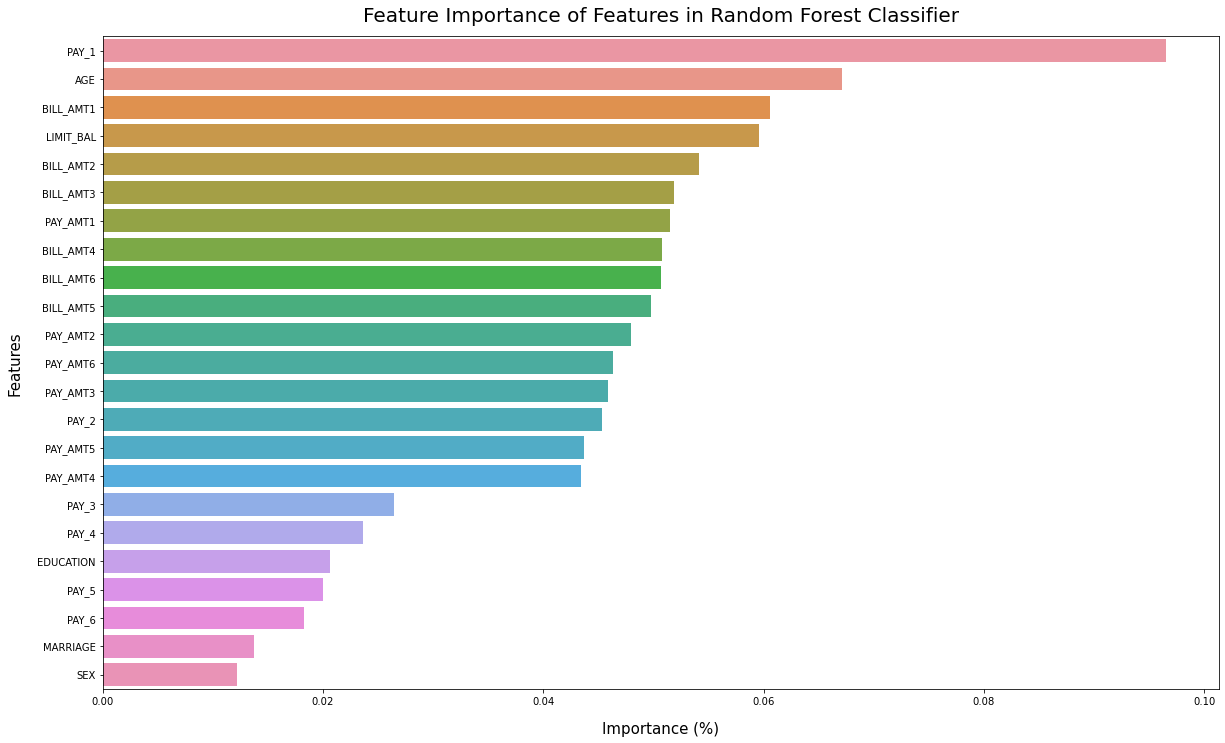

In [131]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x = feature_imp, y = feature_imp.index)
ax.set_title('Feature Importance of Features in Random Forest Classifier', pad=15, size=20)
ax.set_ylabel('Features', labelpad=15, size=15)
ax.set_xlabel('Importance (%)', labelpad=15, size=15)

We can see the feature importance of each feature in the dataset. We can try rerun our random forest using only the feaures with feature importance of above 4%.

By removing features with a feature importance of below 4%, we have improved the model accuracy from 81.53% to 81.63%. This is marginal improvement, and testing with removing more features did not improve model accuracy either.

Furthermore, all tests for accuracy were done using random state 0. When changing the random state, the accuracy changed by as much as 2%. As such marginal change of 0.1% is negligible.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1) 
RFC = RandomForestClassifier(n_estimators = 1000, random_state=0)
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)
Rfc = accuracy_score(y_test, y_pred_RFC)
Result4 = Rfc.round(3)*100
print('RFC Prediction Accuracy : ' + str(Result4))

RFC Prediction Accuracy : 81.5


In [133]:
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2324
           1       0.66      0.38      0.48       676

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



In [134]:
y_pred_proba_RFC = RFC.predict_proba(X_test)[::,1]

In [135]:
fpr_rfc,tpr_rfc,thresh_rfc = roc_curve(y_test, y_pred_proba_RFC)
roc_auc_RFC = auc(fpr_rfc,tpr_rfc)

In [136]:
roc_auc_RFC

0.7782990584485023

In [137]:
cm_rf = confusion_matrix(y_test, y_pred)
print('Confusion matricx for rf_smote:',cm_rf,sep='\n\n')

Confusion matricx for rf_smote:

[[2192  132]
 [ 422  254]]


#### Random Forest SMOTE

After obtaining results of tuned Random forest the class balance method, this is commenced by establishing the right proportions of train test split based on accuracy score shown in form of line chart.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.1, random_state = 1) 

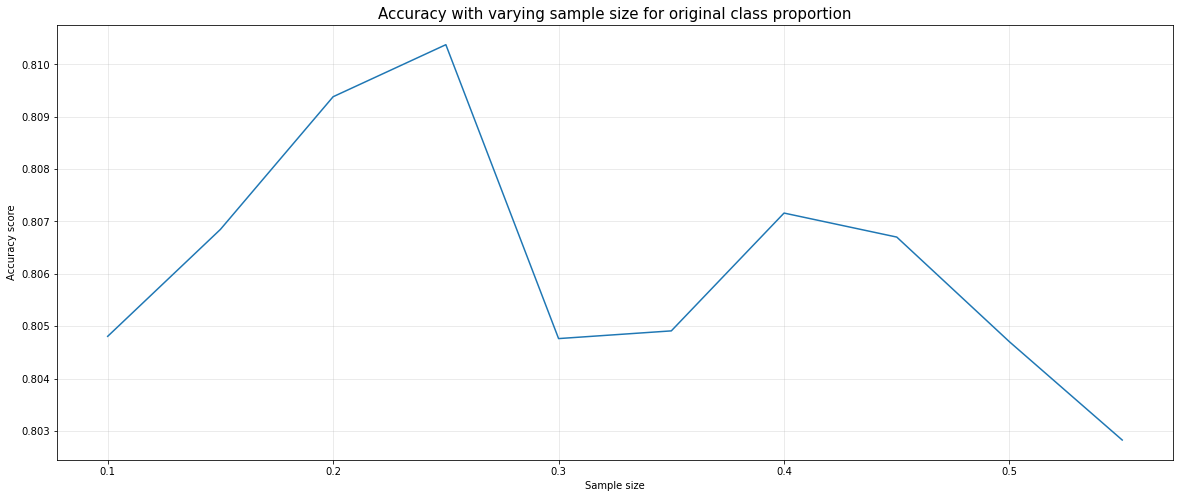

In [139]:
best = []
for i in np.arange(0.1,0.6,step=0.05):
    X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = i, random_state = 1)
    RFC = RandomForestClassifier(n_estimators = 1000, random_state=96)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    best.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(20,8))
plt.title('Accuracy with varying sample size for original class proportion', fontsize=15)
plt.xlabel('Sample size')
plt.ylabel('Accuracy score')
plt.grid(alpha=0.3)
plt.plot(np.arange(0.1,0.6,step=0.05),best)
plt.show()

On the graph it can be seen that the highest accuacy can be achieved with 25% of test component and 75% of training for oversampled class proportions. These component values will be used for smote model.

Additionally the hyperparameter for this model is performed.
The parameters taken into account are max features, max depth and criterion.

In [140]:
rfc = RandomForestClassifier(random_state=96)
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [8,10,12],
              'criterion' :['gini', 'entropy']}

optimal_rf = GridSearchCV(RFC, parameters,cv=3, scoring='accuracy', verbose=3)
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size = 0.25, random_state = 0)

Addressed paramaters are placed into grid search cv and measured by model fitting. The top performer will indicate the highest accuacy score.

In [141]:
optimal_rf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=gini, max_depth=8, max_features=auto;, score=0.818 total time=  12.6s
[CV 2/3] END criterion=gini, max_depth=8, max_features=auto;, score=0.810 total time=  13.3s
[CV 3/3] END criterion=gini, max_depth=8, max_features=auto;, score=0.813 total time=  13.0s
[CV 1/3] END criterion=gini, max_depth=8, max_features=sqrt;, score=0.818 total time=  12.8s
[CV 2/3] END criterion=gini, max_depth=8, max_features=sqrt;, score=0.810 total time=  13.7s
[CV 3/3] END criterion=gini, max_depth=8, max_features=sqrt;, score=0.813 total time=  13.9s
[CV 1/3] END criterion=gini, max_depth=8, max_features=log2;, score=0.818 total time=  13.7s
[CV 2/3] END criterion=gini, max_depth=8, max_features=log2;, score=0.810 total time=  12.8s
[CV 3/3] END criterion=gini, max_depth=8, max_features=log2;, score=0.813 total time=  13.1s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto;, score=0.818 total time=  15.9s
[CV 2/3]

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=96),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy', verbose=3)

In [142]:
optimal_rf.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

The most optimal parameters for this classification with sote model are criterion "entropy", depth of trees : 8 and max_features: auto. The established parameters will besubsequently used for final model fitting in smote variant.

In [143]:
RF_smote = RandomForestClassifier( criterion='entropy', max_depth=8, random_state=96, max_features='auto')

RF_smote.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       random_state=96)

In [144]:
y_pred = RF_smote.predict(X_test)

In [145]:
print( "Accuracy of Random Forest smote model: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)),end='\n\n' )
print(classification_report(y_test,y_pred))

Accuracy of Random Forest smote model: 0.815

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      5858
         1.0       0.71      0.33      0.45      1736

    accuracy                           0.81      7594
   macro avg       0.77      0.64      0.67      7594
weighted avg       0.80      0.81      0.79      7594



The results achieved with smote model are lower than result achieved with entroy model. The decrease is most noticeable in recall where decrease for default label occured in 5%.

The measuremetn for errors in prediction can be viewed by examination of confusion matrix result.

In [146]:
cm_rf_smote = confusion_matrix(y_test, y_pred)
print('Confusion matricx for rf_smote:',cm_rf_smote,sep='\n\n')

Confusion matricx for rf_smote:

[[5623  235]
 [1171  565]]


In [147]:
# calculation of probability for SMOTE random forest to measure ROC AUC score
y_pred_proba_rf_smote = RF_smote.predict_proba(X_test)[::,1]

fpr_rf_smote, tpr_rf_smote, thresh_rf_smote = roc_curve(y_test, y_pred_proba_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)
print('The result of roc auc is: ',roc_auc_rf_smote.round(3))
rf_smote_label = y_test

The result of roc auc is:  0.766


The ROC AUC for smote random forest resulted in 76%, which is lower than 78% in random forest entropy.

## Evaluation of results Phase 1

The fifth stage of the framework focuses on evaluation of results and examining how well models performed in fulfilling the objectives stated in the Business Understanding Phase.
Each of the models will be examined by the degree to which it meets objectives stated at the beginning of the project and examine possible disadvantages and constraints caused by the model.
To achieve that all three scenarios are examined by assessment of four performance metrics.

##### Evaluation measures
In order to evaluate the results of the modeling phase, four methods of evaluations were used to cross examined the results and compare. 
The selected methods were confusion matrix, overall accuracy measured in varying numbers of folds, recall score and ROC AUC analysis.

##### Confusion Matrix
The first method for this examination is assessment of the confusion matrix for each scenario. These matrices can give a detailed insight into proportions of correct predictions for positive and negative labels. The results of that are seen in Figure 8, which depict confusion matrices for each scenario assessed.

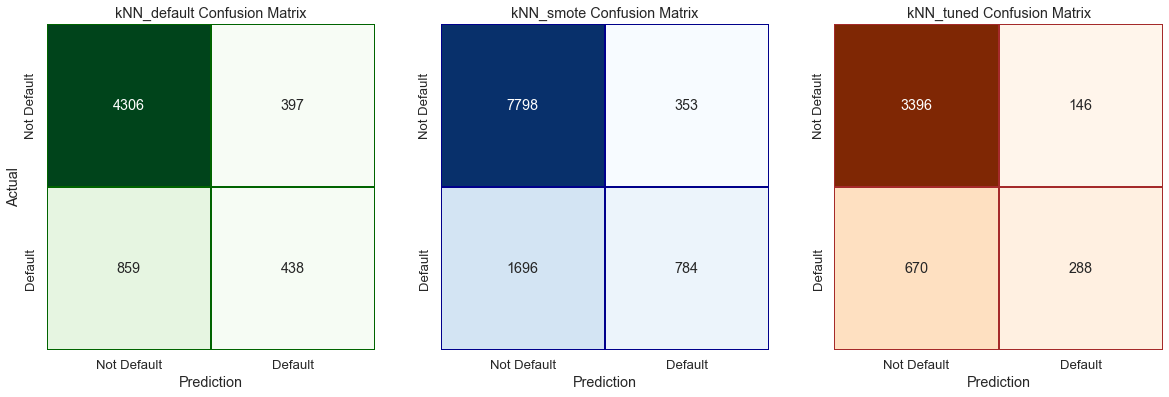

In [148]:
# Setting ticks for all matrices
xticklabels=['Not Default', 'Default']
yticklabels=['Not Default', 'Default']

#fontsize for all ticks
sns.set(font_scale=1.2)

#generating subplots and size of figures
fig, (ax1, ax2, ax3)  = plt.subplots(ncols = 3, figsize=(20,6))

#matrices
sns.heatmap(cm,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax1,
            linewidths=.2,linecolor="Darkgreen", cmap="Greens")
sns.heatmap(cm_smote,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax2,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
sns.heatmap(cm_tuned,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax3,
            linewidths=.2,linecolor="Brown", cmap="Oranges")

#titles for matrices
ax1.title.set_text('kNN_default Confusion Matrix')
ax2.title.set_text('kNN_smote Confusion Matrix')
ax3.title.set_text('kNN_tuned Confusion Matrix')

ax1.set_xlabel('Prediction')
ax2.set_xlabel('Prediction')
ax3.set_xlabel('Prediction')

ax1.set_ylabel('Actual')


plt.show()

The first observation of that is that the total number of samples vary in each scenario. This is because there were two different X variables used for models. default kNN had all predictors contained in  X variable. Smote knn and knn had X variable composed of features selected by the feature importance method. Additionally smote knn has more observations caused by oversampling.
The results indicates that the least amount of mistakes in prediction of default occurs in kNN default, which indicates lowest difference between correct default predictions (438) and errors (859), the worse performance however seem to occur in kNN, which shows the correct default prediction in 288 and errors as 670. 

##### Accuracy of models
The next measure was performed by assessment of 10 different samples (kfolds) measured with accuracy score

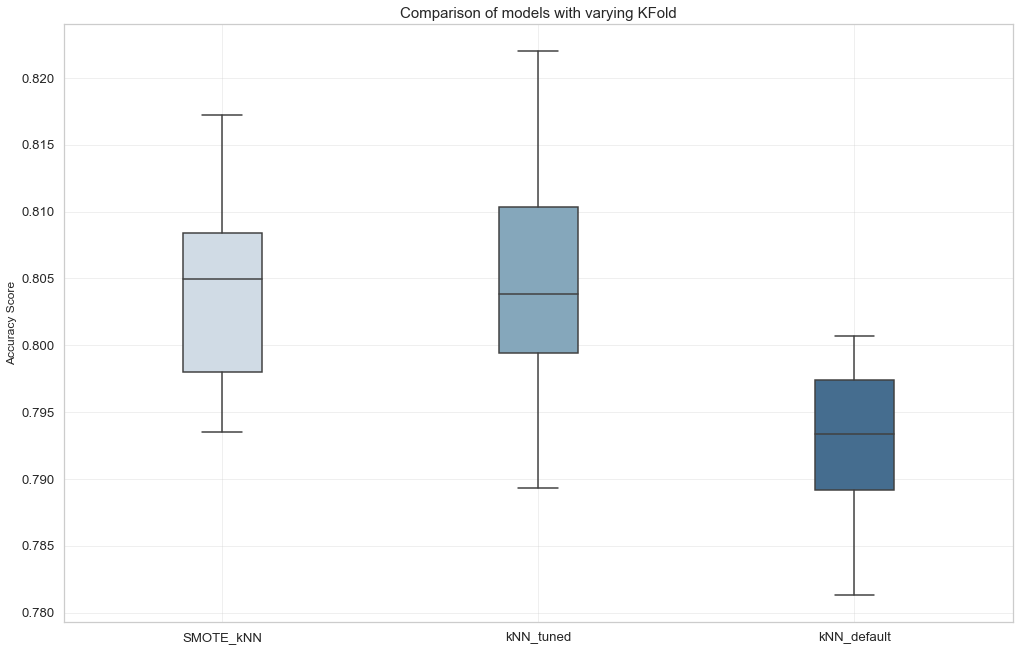

In [149]:
# libraries containing cross validation score and kfold
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
sns.set_style('whitegrid')

#setting cross validation method
cv = KFold(n_splits=10, random_state=0, shuffle=True)

#variable to store results
results = []

#setting 5 splits as kfold
kfold = model_selection.KFold(n_splits=5)

# results of all three scenarios
cv_results = cross_val_score(kNN_smote, X_sam, y_sam, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(kNN_tuned, X2, y1, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(kNN_default, X1, y1, cv=cv, scoring='accuracy')
results.append(cv_results)

#creation of dataframe to easier display the results
results= pd.DataFrame(results)
results = results.T
results.columns = ['SMOTE_kNN', 'kNN_tuned', 'kNN_default']

# visualisation
plt.figure(figsize=(17,11))
sns.boxplot(data=results, palette='Blues',width=0.25,saturation=0.5)
plt.title('Comparison of models with varying KFold', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The examination of this metric shows that kNN has produced the highest accuracy scores with k folds; however, this model contains the highest variance of results, which is seen as the size of boxplot. The Smote knn on the other hand is similar in boxplot size as the default knn and shows better accuracy at the same time. The mean values in SMOTE knn are slightly higher than the result in kNN, which makes this scenario the best scenario from an accuracy point of view. 
The default kNN depicted the lowest accuracy scores, however it makes this scenario a more reliable choice as it has lower variance than the kNN scenario.

The next evaluation is addressd on estimation of recall score for each model. Recall is most important metric collected from this kind of problem as it shows how likely model will predict accuracy of default.

##### 5.2.3 Recall Score
As this project is focused on prediction of default data behaviour, the recall score for each scenario needs to be examined. Recall shows the proportion of correct predictions addressed to positives, which means that it indicates how well model predicted defaults.
The formula of recall is based on formula (True Positives/True Positives + False Negatives)(Machine Learning, 2022)

In [150]:
results

,SMOTE_kNN,kNN_tuned,kNN_default
0,0.806781,0.810667,0.788000
1,0.813035,0.822000,0.797667
2,0.800527,0.803667,0.794000
3,0.808693,0.814000,0.800667
4,0.817254,0.799333,0.792667
5,0.793546,0.799667,0.796667
6,0.803095,0.809333,0.798000
7,0.797168,0.798333,0.790667
8,0.794863,0.789333,0.781333
9,0.807376,0.804000,0.788667


In [151]:
#setting number of folds for cross validation
cv = KFold(n_splits=10, random_state=0, shuffle=True)

#variable to store results of each scenario
results = []
#setting 5 splits as kfold
kfold = model_selection.KFold(n_splits=5)

# results of all three scenarios
cv_results = cross_val_score(kNN_smote, X_sam, y_sam, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(kNN_tuned, X2, y1, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(kNN_default, X1, y1, cv=cv, scoring='recall')
results.append(cv_results)

#cv_results = cross_val_score(svm, X_sam, y_sam, cv=cv, scoring='recall')
#results.append(cv_results)

The average score for SMOTE_kNN is 0.34154525425952376
The average score for kNN is 0.29101966229655446
The average score for kNN_default is 0.34258569075142686


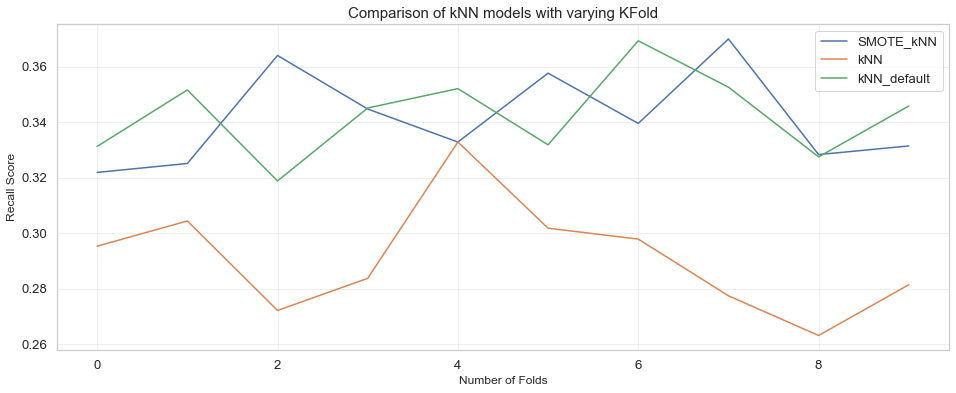

In [152]:
# creating dataframe to easier display the results
results= pd.DataFrame(results)
results = results.T
results.columns = ['SMOTE_kNN', 'kNN', 'kNN_default']


print('The average score for {0} is {1}'.format(results.columns[0],results.iloc[:,0].mean()))
print('The average score for {0} is {1}'.format(results.columns[1],results.iloc[:,1].mean()))
print('The average score for {0} is {1}'.format(results.columns[2],results.iloc[:,2].mean()))


# visualisation of results
plt.figure(figsize=(16,6))
plt.plot(results.iloc[:,0], label=results.columns[0])
plt.plot(results.iloc[:,1], label=results.columns[1])
plt.plot(results.iloc[:,2], label=results.columns[2])


plt.title('Comparison of kNN models with varying KFold', fontsize=15)
plt.ylabel('Recall Score', fontsize=12)
plt.xlabel('Number of Folds', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The scores indicate that the Recall score does not exceed 37% in any of the models. These results are very small, which means that any of these scenarios doesn’t promise reliable predictions for only default values.  Additional observation is the variance, which is similar for smote_knn (mean value 0.342)  and default_knn with minimally better score achieved (mean value 0.343). kNN on the other hand shows much higher variance and lower score (mean 0.291).
This outcome shows the positive influence of class balancing on prediction of default and places SMOTE as a factor increasing in importance for this type of classification.

##### ROC AUC Scores
The last evaluation metric for results is ROC AUC.
Receiving Operator Characteristics (ROC) and Area Under the Curve (AUC) are effective tools in measuring classification  model performance.

Narkhede (2018) explains functionality of  ROC and AUC by stating that ROC is a visualisation of the probability curve and AUC is seen as the measure of class  separability. In simple terms the measure shows how well class separability takes place in models used on dataset. The higher AUC scores depict the higher ability of the model to predict classes correctly.


The average ROC AUC for SMOTE_kNN is 0.741
The average ROC AUC for kNN is 0.709
The average ROC AUC for kNN_default is 0.697


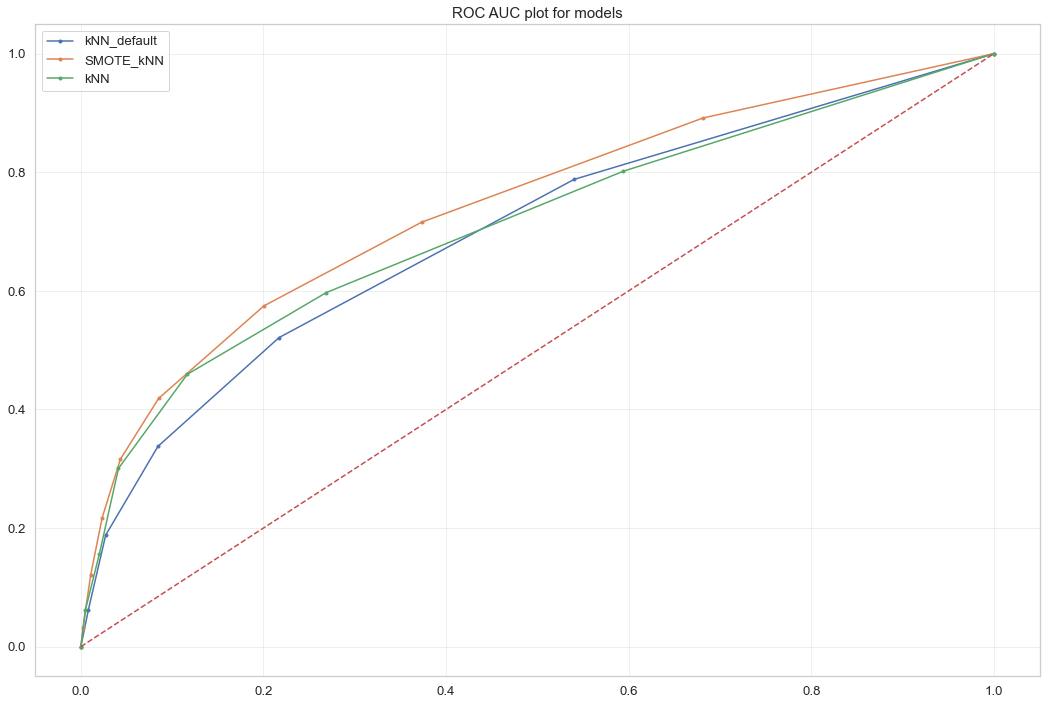

In [153]:
#size of visualisation
plt.figure(figsize=(18,12))

print('The average ROC AUC for {0} is {1}'.format(results.columns[0],roc_auc_kNN_smote.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[1],roc_auc_kNN.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[2],roc_auc_kNN_default.round(3)))


#roc curves for each scenario
plt.plot(fpr_default, tpr_default,marker=".",label=results.columns[2])
plt.plot(fpr_smote, tpr_smote,marker=".",label=results.columns[0])
plt.plot(fpr, tpr,marker=".",label=results.columns[1])

#threshold
plt.plot([0,1],[0,1], linestyle = '--')

plt.title('ROC AUC plot for models', fontsize=15)
plt.legend(loc='best')
plt.grid(alpha=.3)
plt.show()

The ROC AUC comparison depicts that the highest score was achieved with SMOTE_kNN with 0.73 reaching a higher score than tuned kNN on originally balanced class, which achieved score 0.71.
The interpretation of that result shows the highest chance of predicting default in knn when SMOTE had been used. The smote_knn depicts chances of 73% that the correct class is predicted as the highest chance of class separability is present. This score however is not very high. 
The evaluation indicated the advantage of class balancing in modelling and showed the superiority of the SMOTE model over other ones by indicating highest class separability and ability of default class prediction.

### Probability measure: Brier Score

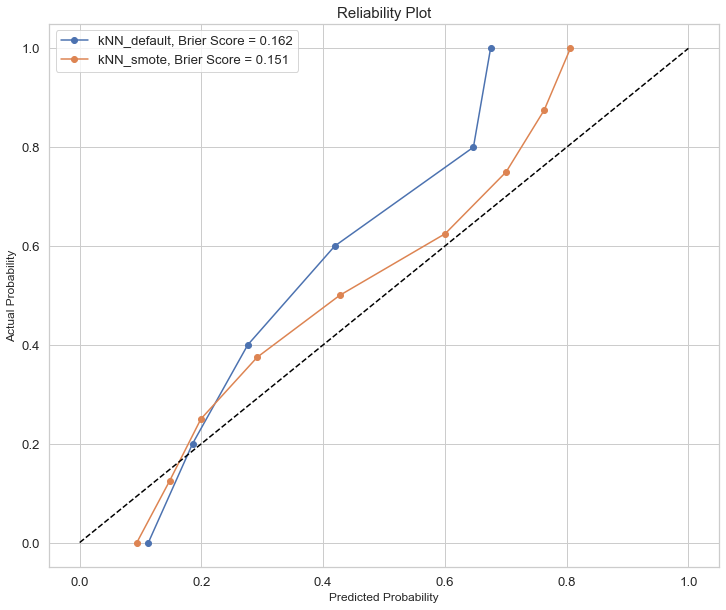

In [154]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

fig = plt.figure(figsize=(12,10))


# KNN_Default
kNN_default_y, kNN_default_x = calibration_curve(label_default,y_pred_proba_KNN_default,
                                                 n_bins=10, normalize=True)
loss_knn_default = brier_score_loss(label_default,y_pred_proba_KNN_default )
plt.plot(kNN_default_y, kNN_default_x, marker='o', label=f'kNN_default, Brier Score = {str(round(loss_knn_default,3))}')

#SMOTE_kNN
kNN_smote_y, kNN_smote_x = calibration_curve(label_smote,y_pred_proba_KNN_smote,
                                                 n_bins=10, normalize=True)
loss_knn_smote = brier_score_loss(label_smote,y_pred_proba_KNN_smote )
plt.plot(kNN_smote_y, kNN_smote_x, marker='o', label=f'kNN_smote, Brier Score = {str(round(loss_knn_smote,3))}')

#tuned_kNN
kNN_tuned_y, kNN_tuned_x = calibration_curve(tuned_label,y_pred_proba_KNN,
                                                 n_bins=10, normalize=True)
loss_knn_tuned = brier_score_loss(tuned_label,y_pred_proba_KNN )

plt.plot([0,1],[0,1], linestyle = '--',c='black')

plt.title('Reliability Plot', fontsize=15)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Actual Probability', fontsize=12)
plt.legend(loc='best')
plt.show()

In [155]:
from tabulate import tabulate

In [156]:
data = [['kNN Default',0.791,0.34, 0.697, 0.162 ],
        ['kNN SMOTE', 0.81, 0.34, 0.741, 0.151],
        ['kNN Tuned', 0.82, 0.29, 0.709, 0.153]]

cols = ['Model','Accuracy', 'Recall', 'ROC AUC','Brier Score' ]

print('Comparison of scores')
print(tabulate(data, headers=cols, tablefmt='fancy_grid'))

Comparison of scores
╒═════════════╤════════════╤══════════╤═══════════╤═══════════════╕
│ Model       │   Accuracy │   Recall │   ROC AUC │   Brier Score │
╞═════════════╪════════════╪══════════╪═══════════╪═══════════════╡
│ kNN Default │      0.791 │     0.34 │     0.697 │         0.162 │
├─────────────┼────────────┼──────────┼───────────┼───────────────┤
│ kNN SMOTE   │      0.81  │     0.34 │     0.741 │         0.151 │
├─────────────┼────────────┼──────────┼───────────┼───────────────┤
│ kNN Tuned   │      0.82  │     0.29 │     0.709 │         0.153 │
╘═════════════╧════════════╧══════════╧═══════════╧═══════════════╛



##### Key observations
The key observations gained from evaluation of examined models are the superiority of smote_knn by achieving the highest scores in class separability and achieving highest recall score when the overall accuracy score was placed below the score achieved by tuned knn model. Beside of that smote_Knn shows the best prediction probability score.
The summary of the results depicts that although the model has good scores, it is still not reliable enough to decide that SMOTE_knn should be used as the primary model for prediction of default in banking. 
The process however depicted a high potential for other machine learning models supported by class balancing methods and possibly use of dimensionality reduction techniques to maximise separability of classes to produce more reliable methods for default prediction.
The further studies will take this component into consideration and use for maximisation of efficiency of other machine learning models compared in phase 2 evaluation.


### Evaluations Phase 2

The evaluation of second phase modeling involved comparison of all models examined with the objective to find the best performance by contrasting hyperparameter tuning and smote variants. 
In fulfilling this objective all models had been examined with the use of the same evaluation metrics used for phase one modeling for kNN algorithms.

The assesment of all mocels was commenced with generation of confusion matrices and comparison of all results mainly with their SMOTE variants and gaining meningful insight from these observations.

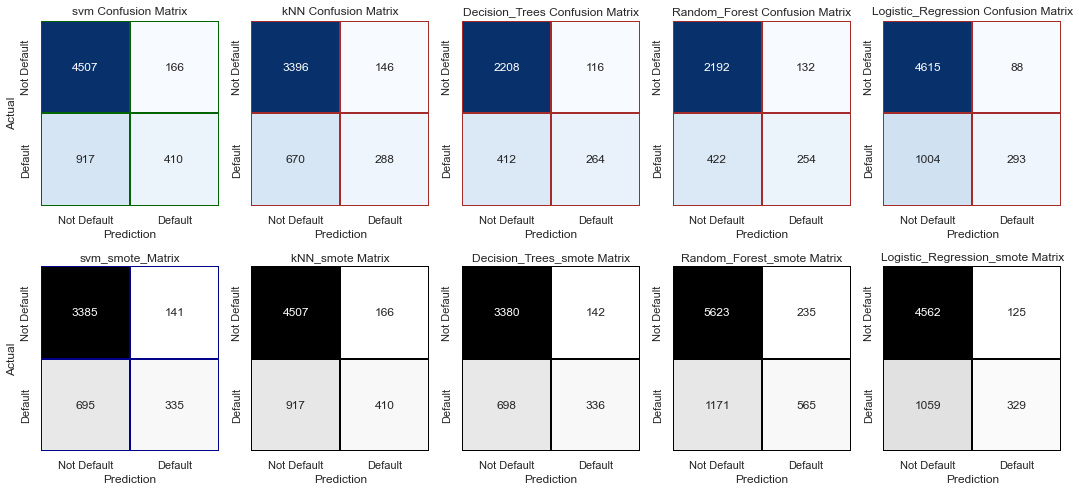

In [157]:
# import pylab to generate right spacing between subplots
from pylab import rcParams
rcParams["figure.autolayout"] = True


# Setting ticks for all matrices
xticklabels=['Not Default', 'Default']
yticklabels=['Not Default', 'Default']

#fontsize for all ticks
sns.set(font_scale=1)

#generating subplots and size of figures
fig, ax  = plt.subplots(nrows = 2, ncols = 5, figsize=(15,7))

#matrices
sns.heatmap(cm_svm,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[0,0],
            linewidths=.2,linecolor="Darkgreen", cmap="Blues")
sns.heatmap(cm_svm_smote,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[1,0],
            linewidths=.2,linecolor="Darkblue", cmap="Greys")
sns.heatmap(cm_tuned,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[0,1],
            linewidths=.2,linecolor="Brown", cmap="Blues")
sns.heatmap(cm_svm,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[1,1],
            linewidths=.2,linecolor="Black", cmap="Greys")
sns.heatmap(cm_dt,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[0,2],
            linewidths=.2,linecolor="Brown", cmap="Blues")
sns.heatmap(cm_dt_smote,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[1,2],
            linewidths=.2,linecolor="Black", cmap="Greys")
sns.heatmap(cm_rf,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[0,3],
            linewidths=.2,linecolor="Brown", cmap="Blues")
sns.heatmap(cm_rf_smote,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[1,3],
            linewidths=.2,linecolor="Black", cmap="Greys")
sns.heatmap(cm_lr,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[0,4],
            linewidths=.2,linecolor="Brown", cmap="Blues")
sns.heatmap(cm_lr_smote,xticklabels=xticklabels,yticklabels=yticklabels
            ,annot=True,fmt='g',cbar=False,ax=ax[1,4],
            linewidths=.2,linecolor="Black", cmap="Greys")


#titles for matrices
ax[0,0].title.set_text('svm Confusion Matrix')
ax[1,0].title.set_text('svm_smote_Matrix')
ax[0,1].title.set_text('kNN Confusion Matrix')
ax[1,1].title.set_text('kNN_smote Matrix')
ax[0,2].title.set_text('Decision_Trees Confusion Matrix')
ax[1,2].title.set_text('Decision_Trees_smote Matrix')
ax[0,3].title.set_text('Random_Forest Confusion Matrix')
ax[1,3].title.set_text('Random_Forest_smote Matrix')
ax[0,4].title.set_text('Logistic_Regression Confusion Matrix')
ax[1,4].title.set_text('Logistic_Regression_smote Matrix')

ax[0,0].set_xlabel('Prediction')
ax[0,1].set_xlabel('Prediction')
ax[0,2].set_xlabel('Prediction')
ax[0,3].set_xlabel('Prediction')
ax[0,4].set_xlabel('Prediction')
ax[1,0].set_xlabel('Prediction')
ax[1,1].set_xlabel('Prediction')
ax[1,2].set_xlabel('Prediction')
ax[1,3].set_xlabel('Prediction')
ax[1,4].set_xlabel('Prediction')


ax[0,0].set_ylabel('Actual')
ax[1,0].set_ylabel('Actual')

plt.show()

All classifiers confusion matrices varies between themselves significanlty in total counts for all observations. By comparing the outputs between smote and hyperparameter tuned version it can be seen that there are lower proportions for errors of 1 and 2 type in support vector machine, kNN and loistic regression. SVM have the output of 335 correct labels of 4556, which is a contribution of 7.3% in correct prediction whereas in tuned model that contribution is 6.8% (410/6000). In KNN this comparison equals in 1% increase compared to hypermparametr tned version 6.4% (288/4500) and in Logistic Regression that increase is the highest showing smote models at 5.4% correct prediction(329/6075) to tuned models (293/6000) 4.8%.

In tree based models the perfomance of default prediction seen in count had decreased for smote models. In Random Forest that contibution was 7.4% for smote (565/7594) and 8.5% in entropy (254/3000). Decision trees had indicated decrease of, where in smote contribution had 7% (336/4556) and in tuned version had 8% (264/3000).

The next metrics used to compare all models was accuracy score applied in stratified cross validation in form of boxplots. By comparing all methods this way, the contrast to smote and also between each model could be identified easier.

In [158]:
from sklearn.model_selection import StratifiedKFold
cv = KFold(n_splits=5, random_state=0, shuffle=True)

#variable to store results
results = []

# results of all models in smote and hyperparameter tuned
cv_results = cross_val_score(svm_default, X1, y1, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(svm, X_sam, y_sam, cv=cv, scoring='accuracy')
results.append(cv_results)

In [159]:
# results of all models in smote and hyperparameter tuned - continuation
cv_results = cross_val_score(kNN_smote, X_sam, y_sam, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(kNN_tuned, X2, y1, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(DTC_entropy, X, y, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(DTC, X_sam, y_sam, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(RFC, X, y, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(RF_smote, X_sam, y_sam, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(lr, X1, y1, cv=cv, scoring='accuracy')
results.append(cv_results)

cv_results = cross_val_score(lr_cv1, X_sam, y_sam, cv=cv, scoring='accuracy')
results.append(cv_results)

#creation of dataframe to easier display the results
results= pd.DataFrame(results)
results = results.T
results.columns = ['SVM','SVM_SMOTE','kNN_SMOTE', 'kNN', 'DTC_Entropy','DTC_SMOTE', 'Random Forest','RF_SMOTE','Logistic Regression','LR_SMOTE']

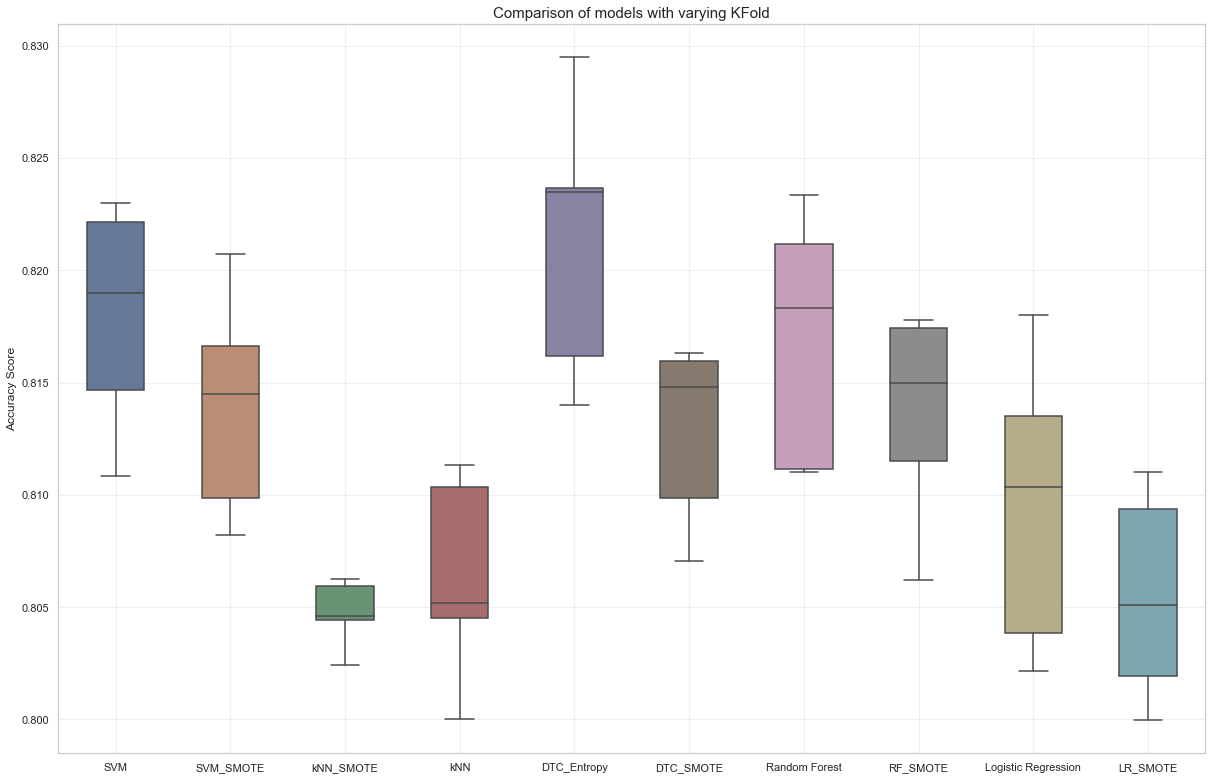

In [160]:
sns.set_style('whitegrid')

# visualisation
plt.figure(figsize=(17,11))
sns.boxplot(data=results,width=0.5,saturation=0.5)
plt.title('Comparison of models with varying KFold', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The visualisation of accuracy had revealed the peculiarity of smaller boxplot ranges in smote classifiers compared to their hypertuning counterparts. The accuracy levels for smote models was also lower. This could be a result of oversampling, which might have an impact on data structure and by that reduce accuracy slightly.

Each models performance ic noticed and better models are recognised as SVM, Decision Trees and Random Forest. The lOwer performance was seen in kNN and Logistic Regression. This is surprising by taking into account higer accuracy score for kNN model in firts phase of modeling. The particularly good scores were achieved by Decision Trees model, where most common results scored almost 82.5%. This result was decreased significanlty in smote version, where the most common result ws 81.5% for the same algorithm. The lowest difference between version applied for the same models was observed in kNN this time, where most common result 80.5% occured in both version of algorithm. 

The visualisation had helped to notice that Tree Based Algorithms (Decision Trees and Random Forest) achieved the best accuracy scores.

Subsequent to this measure, recall score was assessed. The same cross validation methodology had been used but this time with the objective to measure recall scores. Visualisation was presented in form of line charts.

In [161]:
cv = KFold(n_splits=5, random_state=0, shuffle=True)

#variable to store results
results = []

# results of all modelings

cv_results = cross_val_score(kNN_tuned, X2, y1, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(kNN_smote, X_sam, y_sam, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(svm_default, X1, y1, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(svm, X_sam, y_sam, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(DTC_entropy, X, y, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(DTC, X_sam, y_sam, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(RFC, X, y, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(RF_smote, X_sam, y_sam, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(lr, X1, y1, cv=cv, scoring='recall')
results.append(cv_results)

cv_results = cross_val_score(lr_cv1, X_sam, y_sam, cv=cv, scoring='recall')
results.append(cv_results)

In [162]:
# creating dataframe to easier display the results
results= pd.DataFrame(results)
results = results.T
results.columns = ['kNN Tuned', 'kNN SMOTE', 'SVM Tuned', 'SVM SMOTE', 'DT Tuned', 'DT SMOTE', 'RF Tuned', 'RF SMOTE', 'LR Tuned', 'LR SMOTE']

The average score for SVM SMOTE is 0.3294303789005498
The average score for SVM Tuned is 0.31864408351687556
The average score for kNN Tuned is 0.2899562860526224
The average score for kNN SMOTE is 0.3218241455211518
The average score for DT Tuned is 0.3656517065712386
The average score for DT SMOTE is 0.32748633052628756
The average score for RF Tuned is 0.37371211455084896
The average score for RF SMOTE is 0.34052148008619393
The average score for LR Tuned is 0.22925035632372187
The average score for LR SMOTE is 0.2559116539464966


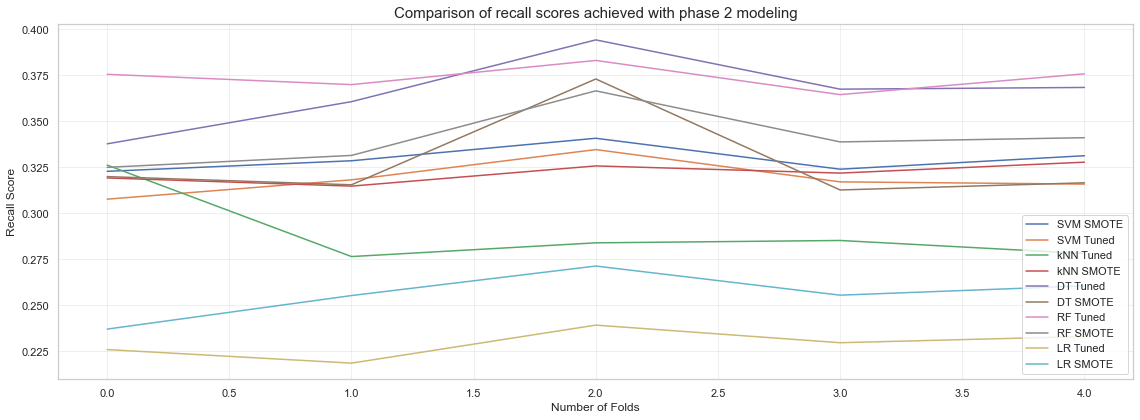

In [163]:
print('The average score for {0} is {1}'.format(results.columns[3],results.iloc[:,3].mean()))
print('The average score for {0} is {1}'.format(results.columns[2],results.iloc[:,2].mean()))
print('The average score for {0} is {1}'.format(results.columns[0],results.iloc[:,0].mean()))
print('The average score for {0} is {1}'.format(results.columns[1],results.iloc[:,1].mean()))
print('The average score for {0} is {1}'.format(results.columns[4],results.iloc[:,4].mean()))
print('The average score for {0} is {1}'.format(results.columns[5],results.iloc[:,5].mean()))
print('The average score for {0} is {1}'.format(results.columns[6],results.iloc[:,6].mean()))
print('The average score for {0} is {1}'.format(results.columns[7],results.iloc[:,7].mean()))
print('The average score for {0} is {1}'.format(results.columns[8],results.iloc[:,8].mean()))
print('The average score for {0} is {1}'.format(results.columns[9],results.iloc[:,9].mean()))

# visualisation of results
plt.figure(figsize=(16,6))
plt.plot(results.iloc[:,3], label=results.columns[3])
plt.plot(results.iloc[:,2], label=results.columns[2])
plt.plot(results.iloc[:,0], label=results.columns[0])
plt.plot(results.iloc[:,1], label=results.columns[1])
plt.plot(results.iloc[:,4], label=results.columns[4])
plt.plot(results.iloc[:,5], label=results.columns[5])
plt.plot(results.iloc[:,6], label=results.columns[6])
plt.plot(results.iloc[:,7], label=results.columns[7])
plt.plot(results.iloc[:,8], label=results.columns[8])
plt.plot(results.iloc[:,9], label=results.columns[9])


plt.title('Comparison of recall scores achieved with phase 2 modeling', fontsize=15)
plt.ylabel('Recall Score', fontsize=12)
plt.xlabel('Number of Folds', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

The results of that visualisation had depicted similiar behaviour and best recall achieved with tree based models with Random Forest having lowest variance in results and oscillating in 37.5% score for default predictability. Second best was Decision Trees with higher variance noticed and reaching almost 40% with its peak result. The lowest results were achieved by Logistic regression hypertuned version, where that ability scored at avergae 22.5% with second worst being smote variant of the same algorithm but having higher recall of 25%. The remaining algorithms have achieved scores in between with smote having positive impact on remaining algorithms.

Following to measurement of ability to seperate classes, ROC AUC was measured. It was done by creating two seperate plot, one outlining the results achieved by hyperparameter tuned variants and the second graph indicating performance of smote variants.
The hyperparameter tuned algorithms were evaluated as first.

The average ROC AUC for kNN Tuned is 0.723
The average ROC AUC for SVM SMOTE is 0.709
The average ROC AUC for DT Tuned is 0.732
The average ROC AUC for RF Tuned is 0.778
The average ROC AUC for LR Tuned is 0.717


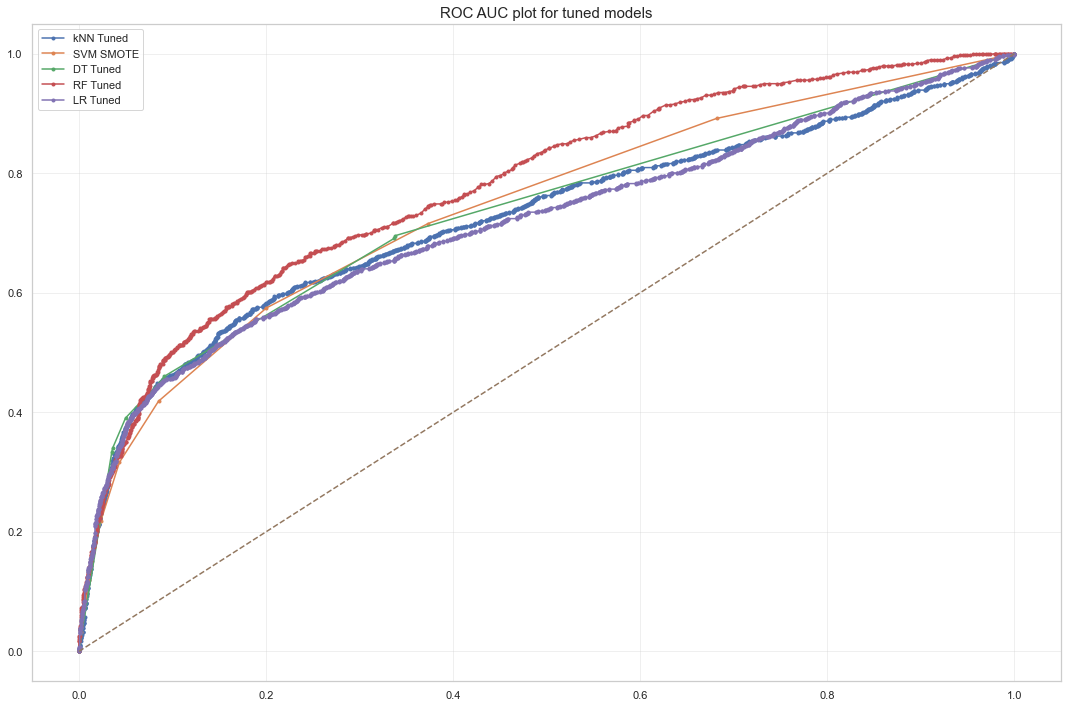

In [164]:
#size of visualisation
plt.figure(figsize=(15,10))

print('The average ROC AUC for {0} is {1}'.format(results.columns[0],roc_auc_dsvm.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[3],roc_auc_kNN.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[4],roc_auc_DTC_entropy.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[6],roc_auc_RFC.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[8],roc_auc_lr.round(3)))

#roc curves for each scenario
plt.plot(fpr_dsvm, tpr_dsvm,marker=".",label=results.columns[0])
plt.plot(fpr_smote, tpr_smote,marker=".",label=results.columns[3])
plt.plot(fpr_dt_entropy, tpr_dt_entropy,marker=".",label=results.columns[4])
plt.plot(fpr_rfc, tpr_rfc,marker=".",label=results.columns[6])
plt.plot(fpr_lr, tpr_lr,marker=".",label=results.columns[8])
#threshold
plt.plot([0,1],[0,1], linestyle = '--')

plt.title('ROC AUC plot for tuned models', fontsize=15)
plt.legend(loc='best')
plt.grid(alpha=.3)
plt.show()

The output of analysis shows very impressive Random Forest class seperability of 78% comparing to other models tested. This result is considered as very good in this type of task. The lowest score on the other hand was achieved by support vector machine with 71%. The difference between these two models is 7%, which is considered as high i terms of modeling perfomance.

Subsequently to that SMOTE models have been checked.

The average ROC AUC for kNN SMOTE is 0.698
The average ROC AUC for SVM Tuned is 0.741
The average ROC AUC for DT SMOTE is 0.728
The average ROC AUC for RF SMOTE is 0.766
The average ROC AUC for LR SMOTE is 0.732


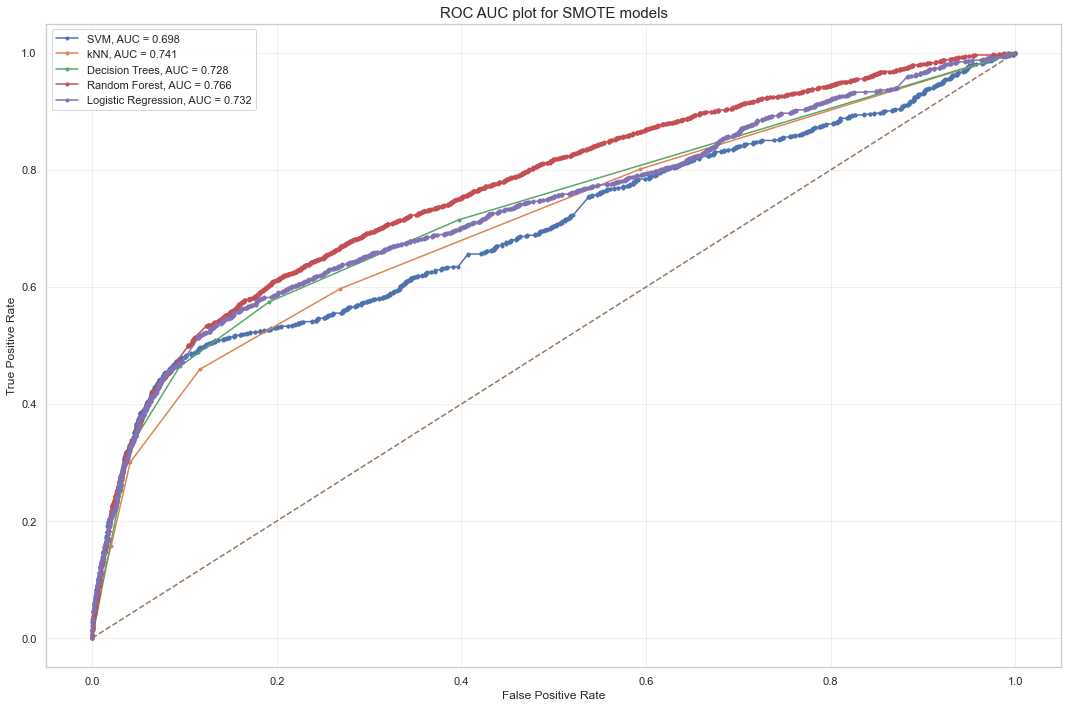

In [165]:
#size of visualisation
plt.figure(figsize=(15,10))

print('The average ROC AUC for {0} is {1}'.format(results.columns[1],roc_auc_svm.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[2],roc_auc_kNN_smote.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[5],roc_auc_dt_smote.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[7],roc_auc_rf_smote.round(3)))
print('The average ROC AUC for {0} is {1}'.format(results.columns[9],roc_auc_lr_smote.round(3)))

#roc curves for each scenario
plt.plot(fpr_svm, tpr_svm,marker=".",label=f'SVM, AUC = {str(round(roc_auc_svm,3))}')
plt.plot(fpr, tpr,marker=".",label=f'kNN, AUC = {str(round(roc_auc_kNN_smote,3))}')
plt.plot(fpr_dt_smote, tpr_dt_smote,marker=".",label=f'Decision Trees, AUC = {str(round(roc_auc_dt_smote,3))}')
plt.plot(fpr_rf_smote, tpr_rf_smote,marker=".",label=f'Random Forest, AUC = {str(round(roc_auc_rf_smote,3))}')
plt.plot(fpr_lr_smote, tpr_lr_smote,marker=".",label=f'Logistic Regression, AUC = {str(round(roc_auc_lr_smote,3))}')
#threshold
plt.plot([0,1],[0,1], linestyle = '--')

plt.title('ROC AUC plot for SMOTE models', fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(alpha=.3)
plt.show()

With achieved results the first noticeable observation is differing results than ones achieved with hypertuned versions. Tree based algorithms have resulted in lower class seperability(Radnom Forest have decreased from 78% to 76.6% and Decision Trees have decreased from 73.2% to 72.8%, svm also achieved poorer performance and got result below 70% threshold. On the other hand the better scores were observed in Knn and Logistic Regression where the former increased by ober 2% and the latter had increased by nearly 2%.

This assement had revelaed the positive effect of smote on some algorithms but worse performance in top score classifiers.
The last measure used for evaluation of phase 2 was Brier Score, which objective was placed on assesment of errors in probability of prediction. The aim in this measure was to identify the model with lowest Brier score indicating lower error probability.

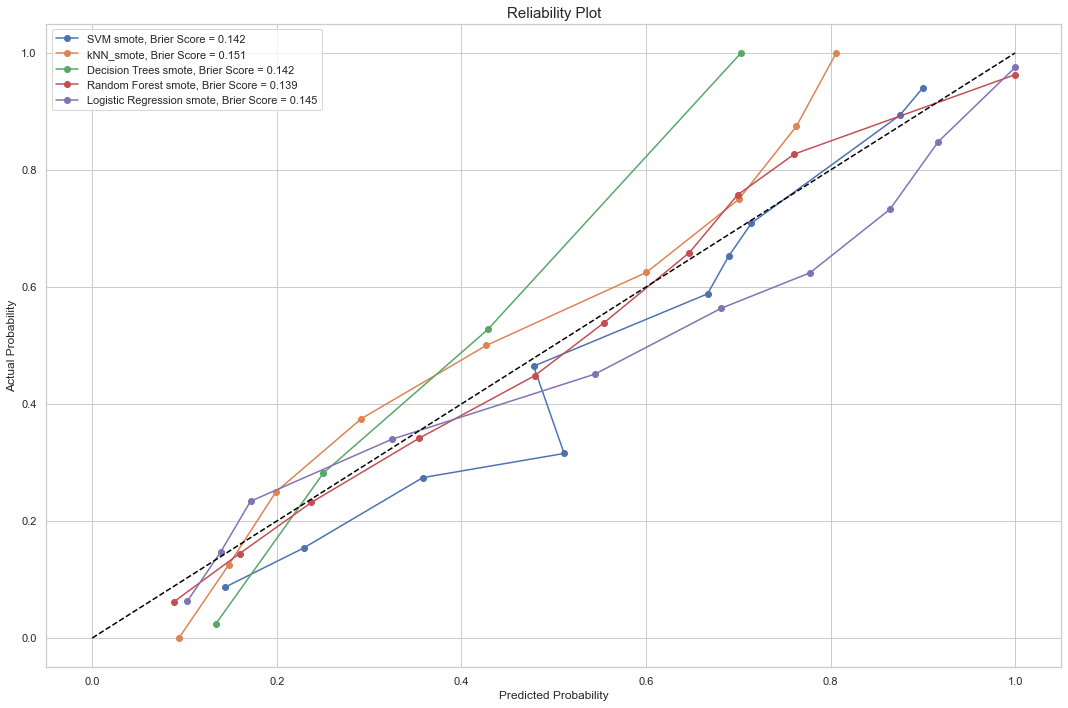

In [166]:
fig = plt.figure(figsize=(15,10))

# SVM
svm_smote_y, svm_smote_x = calibration_curve(svm_label,y_pred_proba_svm,
                                                 n_bins=10, normalize=True)
loss_svm_smote = brier_score_loss(svm_label,y_pred_proba_svm )
plt.plot(svm_smote_y, svm_smote_x, marker='o', label=f'SVM smote, Brier Score = {str(round(loss_svm_smote,3))}')

# kNN
kNN_smote_y, kNN_smote_x = calibration_curve(label_smote,y_pred_proba_KNN_smote,
                                                 n_bins=10, normalize=True)
loss_knn_smote = brier_score_loss(label_smote,y_pred_proba_KNN_smote )
plt.plot(kNN_smote_y, kNN_smote_x, marker='o', label=f'kNN_smote, Brier Score = {str(round(loss_knn_smote,3))}')

# Decision Trees
dt_smote_y, dt_smote_x = calibration_curve(dt_smote_label,y_pred_proba_dt_smote,
                                                 n_bins=10, normalize=True)
loss_dt_smote = brier_score_loss(dt_smote_label,y_pred_proba_dt_smote )
plt.plot(dt_smote_y, dt_smote_x, marker='o', label=f'Decision Trees smote, Brier Score = {str(round(loss_dt_smote,3))}')

#Random Forest
rf_smote_y, rf_smote_x = calibration_curve(rf_smote_label,y_pred_proba_rf_smote,
                                                 n_bins=10, normalize=True)
loss_rf_smote = brier_score_loss(rf_smote_label,y_pred_proba_rf_smote )
plt.plot(rf_smote_y, rf_smote_x, marker='o', label=f'Random Forest smote, Brier Score = {str(round(loss_rf_smote,3))}')

#Logistic Regression
lr_smote_y, lr_smote_x = calibration_curve(lr_smote_label,y_pred_proba_log_smote,
                                                 n_bins=10, normalize=True)
loss_lr_smote = brier_score_loss(lr_smote_label,y_pred_proba_log_smote )
plt.plot(lr_smote_y, lr_smote_x, marker='o', label=f'Logistic Regression smote, Brier Score = {str(round(loss_lr_smote,3))}')

plt.plot([0,1],[0,1], linestyle = '--',c='black')

plt.title('Reliability Plot', fontsize=15)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Actual Probability', fontsize=12)
plt.legend(loc='best')
plt.show()

SMOTE measurements had indicated the most positive result in Random Forest although the negative impact of class balance methodology observed in prior measurements. The score for this classifier was 0.139, which indicate lowest probability of errors in prediction process. The lowest result was achieved with kNN with Brier Score of 0.151, which implies that this classifier should be avoided to be used to reduce possibility of errors obtained in class predictions.

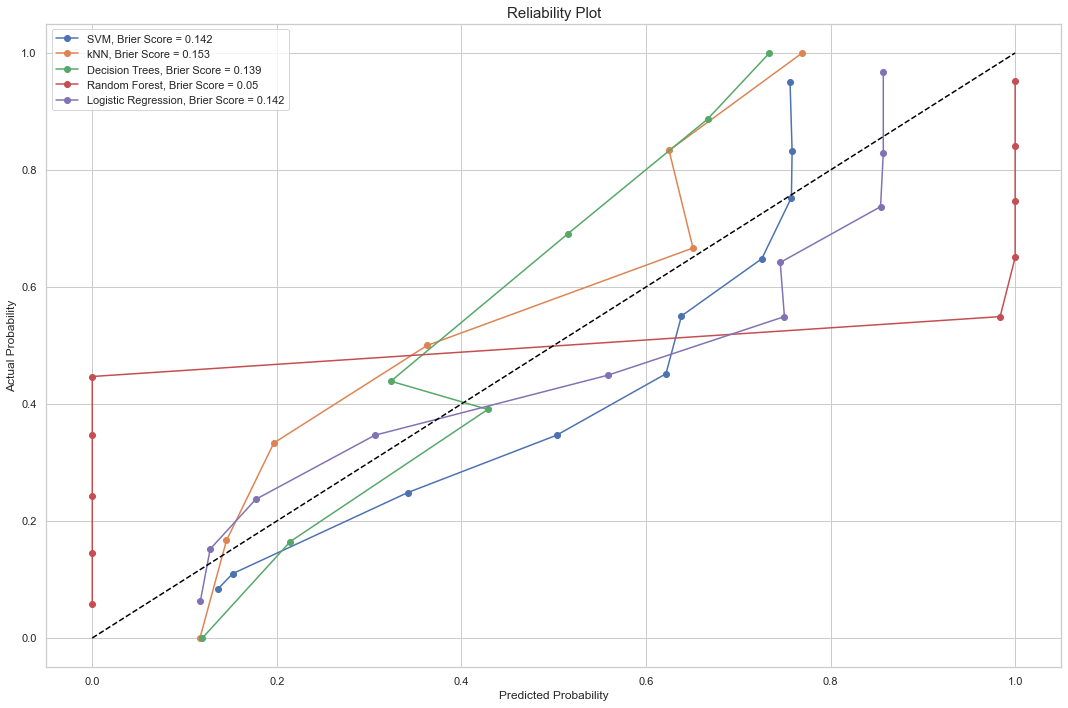

In [167]:
fig = plt.figure(figsize=(15,10))


# svm
dsvm_y, dsvm_x = calibration_curve(dsvm_label,y_pred_proba_dsvm,
                                                 n_bins=10, normalize=True)
loss_dsvm = brier_score_loss(dsvm_label,y_pred_proba_dsvm )
plt.plot(dsvm_y, dsvm_x, marker='o', label=f'SVM, Brier Score = {str(round(loss_dsvm,3))}')

#kNN
kNN_tuned_y, kNN_tuned_x = calibration_curve(tuned_label,y_pred_proba_KNN,
                                                 n_bins=10, normalize=True)
loss_knn_tuned = brier_score_loss(tuned_label,y_pred_proba_KNN )
plt.plot(kNN_tuned_y, kNN_tuned_x, marker='o', label=f'kNN, Brier Score = {str(round(loss_knn_tuned,3))}')

# decision trees
dt_entropy_y, dt_entropy_x = calibration_curve(label_DTC_entropy,y_pred_proba_dt_entrpy,
                                                 n_bins=10, normalize=True)
loss_dt_entropy = brier_score_loss(label_DTC_entropy,y_pred_proba_dt_entrpy )
plt.plot(dt_entropy_y, dt_entropy_x, marker='o', label=f'Decision Trees, Brier Score = {str(round(loss_dt_entropy,3))}')

#Random Forest
rfc_y, rfc_x = calibration_curve(y_pred_RFC,y_pred_proba_RFC,
                                                 n_bins=10, normalize=True)
loss_rfc = brier_score_loss(y_pred_RFC,y_pred_proba_RFC )
plt.plot(rfc_y, rfc_x, marker='o', label=f'Random Forest, Brier Score = {str(round(loss_rfc,3))}')

#Logistic Regression
lr_y, lr_x = calibration_curve(lr_label,y_pred_proba_log,
                                                 n_bins=10, normalize=True)
loss_lr = brier_score_loss(lr_label,y_pred_proba_log )
plt.plot(lr_y, lr_x, marker='o', label=f'Logistic Regression, Brier Score = {str(round(loss_lr,3))}')

plt.plot([0,1],[0,1], linestyle = '--',c='black')

plt.title('Reliability Plot', fontsize=15)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Actual Probability', fontsize=12)
plt.legend(loc='best')
plt.show()

In hypertuned version Brier score was observed very significant imporvement for Random Forest with very lottlw error of probability prediction scoring 0.05. There was seen that most of the other models have achieved very similiar results as smote versions. The high difference in Random Forest variants and comparison of other metrics performed prior to Brier score suggests that Random Forest performs much better without smote class balancing.

The subsequent part of evaluation comprises of summary table of all results achieved in phase 2.

In [168]:
from sklearn.metrics import recall_score, accuracy_score

In [169]:
data = [['kNN Tuned', 0.82, 0.29, 0.709, 0.153],
        ['kNN SMOTE', 0.81, 0.34, 0.741, 0.151],
        ['SVM Tuned', 0.82, 0.31, 0.723, 0.142],
        ['SVM SMOTE', 0.82, 0.33, 0.698, 0.142],
        ['DT Tuned', 0.824, 0.39, 0.732, 0.139],
        ['DT SMOTE', 0.816, 0.32, 0.728, 0.142],
        ['RF Tuned', 0.815, 0.38, 0.778, 0.05],
        ['RF SMOTE', 0.815, 0.33, 0.766, 0.139],
        ['LR Tuned', 0.818, 0.23, 0.716, 0.142],
        ['LR SMOTE', 0.805, 0.24, 0.732, 0.145]]

cols = ['Model','Accuracy', 'Recall', 'ROC AUC','Brier Score' ]

print('Comparison of scores')
print(tabulate(data, headers=cols, tablefmt='fancy_grid'))

Comparison of scores
╒═══════════╤════════════╤══════════╤═══════════╤═══════════════╕
│ Model     │   Accuracy │   Recall │   ROC AUC │   Brier Score │
╞═══════════╪════════════╪══════════╪═══════════╪═══════════════╡
│ kNN Tuned │      0.82  │     0.29 │     0.709 │         0.153 │
├───────────┼────────────┼──────────┼───────────┼───────────────┤
│ kNN SMOTE │      0.81  │     0.34 │     0.741 │         0.151 │
├───────────┼────────────┼──────────┼───────────┼───────────────┤
│ SVM Tuned │      0.82  │     0.31 │     0.723 │         0.142 │
├───────────┼────────────┼──────────┼───────────┼───────────────┤
│ SVM SMOTE │      0.82  │     0.33 │     0.698 │         0.142 │
├───────────┼────────────┼──────────┼───────────┼───────────────┤
│ DT Tuned  │      0.824 │     0.39 │     0.732 │         0.139 │
├───────────┼────────────┼──────────┼───────────┼───────────────┤
│ DT SMOTE  │      0.816 │     0.32 │     0.728 │         0.142 │
├───────────┼────────────┼──────────┼───────────┼──────

##### Key observations
The evaluation of all scores achieved in phase 2 and taking into account results in phase 1 had revealed that the best performance achieved was seen in tree based models with preference towards Random Forest. This algorithm had achieved substantial dominance when compared to other models and achieved ery impressive 0.05 score of probability error and 78% of class seperability in ROC AUC. The additional positive signs were observed in low variance achieved in recall scores. All these results were achieved without smote class balancing and it was confirmed that negative effect of smote is obtained in both tree based models. 

Although the positive effect of class balancing cn be observedand was proved for models such Support Vector Machin, logistic Regression and kNN. It can be concluded that best performing algorithm do not require this technique to achieve high results and contraty to other models the methodology can decrease models perfomance.


## Conclusion

The present analysis has outlined the procedure for detailed examination of classifying algorithms from the perspective of prediction accuracy and probability of credit card default.
This process has commenced by following established business strategy programs and crisp dm framework. The dataset properties have been carefully examined and subsequently data went through a data preparation process, which ensured the highest efficiency of models used in modeling phases.
Although in initial modeling applied on kNN algorithms the potential for SMOTE class balancing was observed and measured in increased scores for class separability and prediction of probability the ultimate comparison achieved in further analysis have proven that decision based algorithms are most accurate and precise algorithms with no requirements for class balance methodology. The further planning and execution of prediction will be based on these models and their improvement during future applications


### Bibliography:


Amarasinghe, P., A. (2019). Predicting Probability of Credit Card Default at the Stage of Credit Card Application Using Supervised Machine Learning Approaches. University of Colombo School of Computing. Online, Available at: https://dl.ucsc.cmb.ac.lk/jspui/bitstream/123456789/4583/1/2018%20BA%20003.pdf [Accessed 27.11.2022]

Allwright, S. (2022). What is a good accuracy score in machine learning?Stephen Allwright. online, available at: https://stephenallwright.com/good-accuracy-score/ [accessed 31.10.2022]

Ben Fraj, M. (2018). In Depth: Parameter tuning for SVC.Medium. Online, available at: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769 [Accessed 27.11.2022]

“Cross Validation: evaluating estimator performance.” scikit-learn developers, 2007-2022, https://scikit-learn.org/stable/modules/cross_validation.html. Accessed 22 October 2022.

“default of credit card clients Data Set.” UCI Machine Learning Repository, 26 January 2016, https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. Accessed 22 October 2022.

Gandhi, R. (2018). Support Vector Machine — Introduction to Machine Learning Algorithms. Towards Data Science. Online, available at: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 [Accessed 27.11.2022].

Gupta, S. (2021). Regression vs Classification in Machine Learning: What's the Difference. Springboard.[online], available at: https://www.springboard.com/blog/data-science/regression-vs-classification/#:~:text=The%20most%20significant%20difference%20between,types%20of%20machine%20learning%20algorithms. [Accessed 29 October 2022].

Grant, P. (2019). Introducing k-Nearest Neighbors.towards data science. online. available at: https://towardsdatascience.com/introducing-k-nearest-neighbors-7bcd10f938c5 [accessed 29 October 2022]

Harrison, O. (2018). “Machine Learning Basics with the K-Nearest Neighbors Algorithm.” towards data science, https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761. Accessed 23 October 2022.

Narkhede, S. (2018). Understanding AUC - ROC Curve. towards data science. online. Available at: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 [accessed 31.10.2022]

WANG, ERIC, and Lucy Ingold. “The Taiwan Credit Card Crisis - Financial Ethics.” Seven Pillars Institute, https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/. Accessed 22 October 2022.

“What is the CRISP-DM methodology”. Smart Vision Europe, 2022, https://www.sv-europe.com/crisp-dm-methodology/ . Accessed 29 October 2022

Benner, J. (2020) Cross-validation and hyperparameter tuning: How to optimise your machine learning model, Medium. Towards Data Science. Available at: https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d (Accessed: November 24, 2022). 